In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_i oficial data

## Reading the dataset

In [3]:
xls = pd.ExcelFile(
    "../../../data/raw/partner_i-Oficial/DB_Master_CP1_latest v03.06.xlsx",
    engine="openpyxl",
)
df = pd.read_excel(xls, "DB3 Cimento Shipping", header=[1, 2])

<IPython.core.display.Javascript object>

## Initial Preprocessing

In [4]:
df = pd.concat([df["Date"], df["Time"], df["Composition"], df["Properties"]], axis=1)
df = df.drop([0, 1, 2], axis=0).reset_index(drop=True)

df = pd.concat(
    [
        df["Production"].iloc[:, 0],
        df["Measurement"].iloc[:, 0],
        df["Production"].iloc[:, 1].rename("Production.1"),
        df["Measurement"].iloc[:, 1].rename("Measurement.1"),
        df.drop(["Production", "Measurement"], axis=1),
    ],
    axis=1,
)

df = df.infer_objects()

<IPython.core.display.Javascript object>

In [5]:
df = df[df["Remarks"] == "CPIIF40 Expedido"].reset_index(drop=True)
df = df.rename({"Production": "Date"}, axis=1)
df = df.drop(["Measurement", "Production.1", "Measurement.1"], axis=1)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

<IPython.core.display.Javascript object>

## EDA

In [6]:
df.shape

(611, 54)

<IPython.core.display.Javascript object>

In [7]:
df.head()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,2020-01-02,60.007980,3.67285,0.19218,4.27263,18.556379,4.43558,1.21612,NO DATA,2.79746,...,130.0,190.0,3.06,NaN,36.500000,41.000000,46.400002,0.0,0.8,1.5
1,2020-01-06,60.376080,3.62883,0.19847,4.34362,18.869631,4.15419,1.22138,NaN,2.93591,...,130.0,180.0,3.06,NaN,36.799999,41.099998,46.500000,0.0,0.5,1.0
2,2020-01-09,60.510601,3.61015,0.19329,4.40916,19.119410,4.10858,1.22595,NaN,2.96005,...,130.0,190.0,3.06,NaN,36.799999,41.400002,46.099998,0.0,0.6,1.2
3,2020-01-14,60.493279,3.60935,0.19701,4.41264,19.140221,4.06337,1.23376,NaN,2.97549,...,135.0,190.0,3.06,NaN,37.000000,41.200001,46.200001,0.0,0.6,1.2
4,2020-01-17,60.384220,3.65648,0.19542,4.39660,18.993719,4.31567,1.22358,NaN,2.91391,...,130.0,190.0,3.06,NaN,38.200001,40.900002,46.799999,0.0,0.7,1.4


<IPython.core.display.Javascript object>

In [8]:
df.tail()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
606,2022-04-16,59.479660,4.07012,0.22739,4.42532,19.204861,3.71192,1.20717,NaN,3.19553,...,150.0,200.0,3.06,NaN,37.599998,42.500000,NaN,0.0,0.70,1.50
607,2022-04-19,59.565899,4.00957,0.23313,4.40217,19.087370,4.18650,1.19611,NaN,3.12729,...,140.0,200.0,3.06,NaN,38.200001,42.599998,NaN,0.0,1.00,2.60
608,2022-04-25,59.629230,4.01784,0.22137,4.37811,18.885000,3.99234,1.22936,NaN,3.07699,...,150.0,210.0,3.06,NaN,38.900002,43.000000,NaN,0.0,1.00,2.30
609,2022-04-27,58.469471,3.77865,0.20256,4.25967,17.754181,3.73452,1.16627,NaN,2.98577,...,140.0,200.0,3.06,NaN,38.099998,42.200001,NaN,1.1,1.04,1.08
610,2022-05-02,58.607109,3.95428,0.19921,4.25052,17.960119,3.72269,1.22611,NaN,3.02348,...,140.0,195.0,3.06,NaN,37.599998,41.500000,NaN,0.0,1.10,2.30


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         611 non-null    datetime64[ns]
 1   CaO                          608 non-null    float64       
 2   MgO                          608 non-null    float64       
 3   Na2O                         608 non-null    float64       
 4   Al2O3                        608 non-null    float64       
 5   SiO2                         608 non-null    float64       
 6   SO3                          608 non-null    float64       
 7   K2O                          608 non-null    float64       
 8   TiO2                         1 non-null      object        
 9   Fe2O3                        608 non-null    float64       
 10  Ca(OH)2                      1 non-null      object        
 11  CaCO3                        1 non-null      

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [10]:
df.dtypes.value_counts()

float64           49
object             4
datetime64[ns]     1
dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CaO,608.0,59.636901,1.291387,51.316422,59.302382,59.858341,60.321752,62.295448
MgO,608.0,2.906795,0.487524,1.642760,2.539525,2.897600,3.264247,4.070120
Na2O,608.0,0.197007,0.027439,0.106250,0.182480,0.199440,0.212100,0.312590
Al2O3,608.0,4.289853,0.178220,3.541440,4.207475,4.307805,4.405260,5.512240
SiO2,608.0,18.609393,0.755815,15.129930,18.295942,18.752180,19.086187,20.588160
SO3,608.0,3.891380,0.339898,2.790660,3.659945,3.912120,4.114335,5.291040
K2O,608.0,1.202164,0.091165,0.668960,1.175918,1.214715,1.250130,1.399550
Fe2O3,608.0,3.000896,0.166804,2.126500,2.896745,2.980860,3.124515,3.388560
Total alkali as Na2O,413.0,0.955368,0.077205,0.576030,0.916330,0.958800,1.010000,1.150000
Soundness,568.0,0.013292,0.112312,0.000000,0.000000,0.000000,0.000000,1.000000


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [12]:
df.describe(exclude="number").T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Date,611,436,2020-09-14 00:00:00,3,2020-01-02,2022-05-02
TiO2,1,1,NO DATA,1,NaT,NaT
Ca(OH)2,1,1,NO DATA,1,NaT,NaT
CaCO3,1,1,NO DATA,1,NaT,NaT
Remarks,611,1,CPIIF40 Expedido,611,NaT,NaT


<IPython.core.display.Javascript object>

In [13]:
df["Remarks"].unique()

array(['CPIIF40 Expedido'], dtype=object)

<IPython.core.display.Javascript object>

In [14]:
print(df["Date"].min())
print(df["Date"].max())

2020-01-02 00:00:00
2022-05-02 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

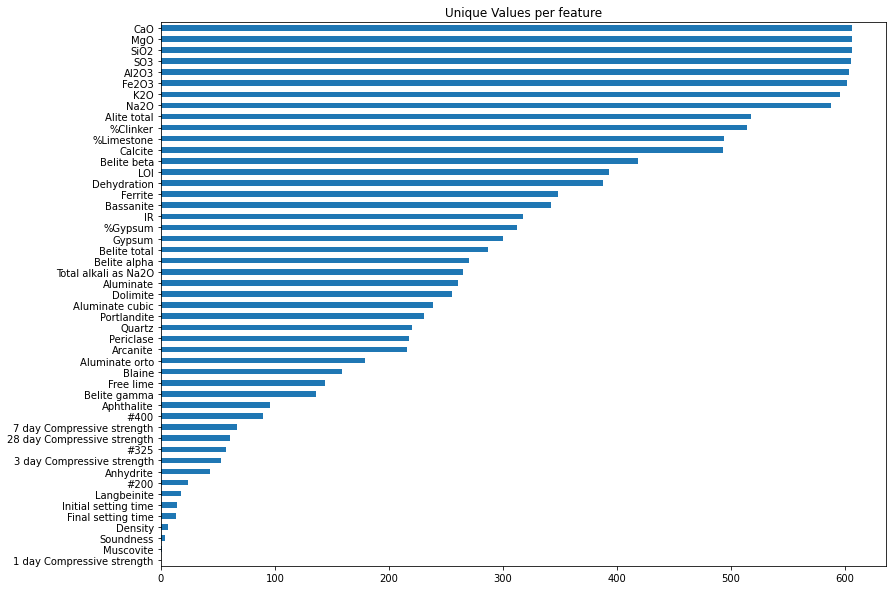

<IPython.core.display.Javascript object>

In [15]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TiO2'),
  Text(1, 0, 'Ca(OH)2'),
  Text(2, 0, 'CaCO3'),
  Text(3, 0, 'Remarks'),
  Text(4, 0, 'Date')])

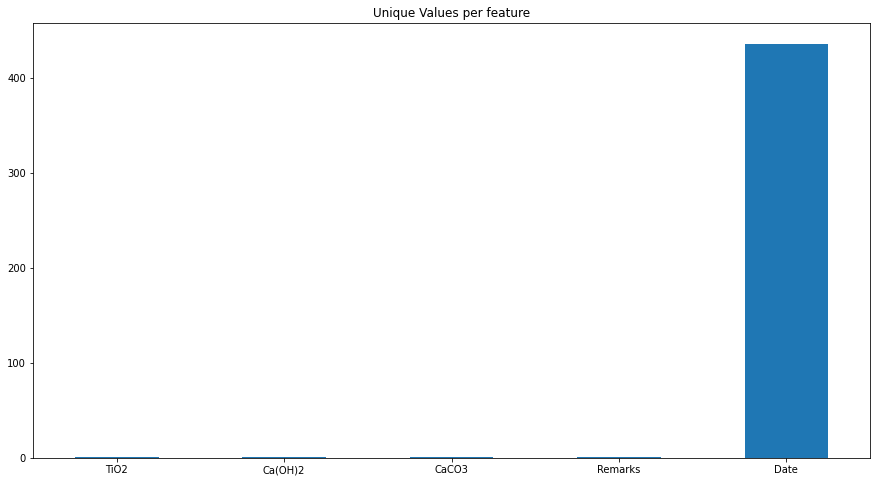

<IPython.core.display.Javascript object>

In [16]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [17]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 52 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [18]:
df.isna().any()

Date                           False
CaO                             True
MgO                             True
Na2O                            True
Al2O3                           True
SiO2                            True
SO3                             True
K2O                             True
TiO2                            True
Fe2O3                           True
Ca(OH)2                         True
CaCO3                           True
Total alkali as Na2O            True
Soundness                       True
LOI                             True
IR                              True
Alite total                     True
Belite total                    True
Belite alpha                    True
Belite beta                     True
Belite gamma                    True
Ferrite                         True
Aluminate                       True
Aluminate cubic                 True
Aluminate orto                  True
Free lime                       True
Portlandite                     True
P

<IPython.core.display.Javascript object>

In [19]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
1 day Compressive strength,611
CaCO3,610
Ca(OH)2,610
TiO2,610
Langbeinite,425
Belite total,247
Dehydration,213
Total alkali as Na2O,198
Soundness,43
%Clinker,26


<IPython.core.display.Javascript object>

In [20]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  3956 missing values.


<IPython.core.display.Javascript object>

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

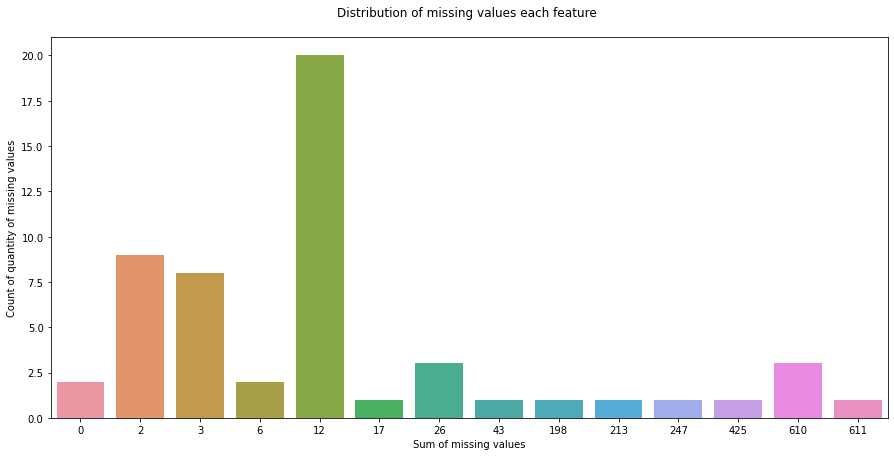

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 54 artists>

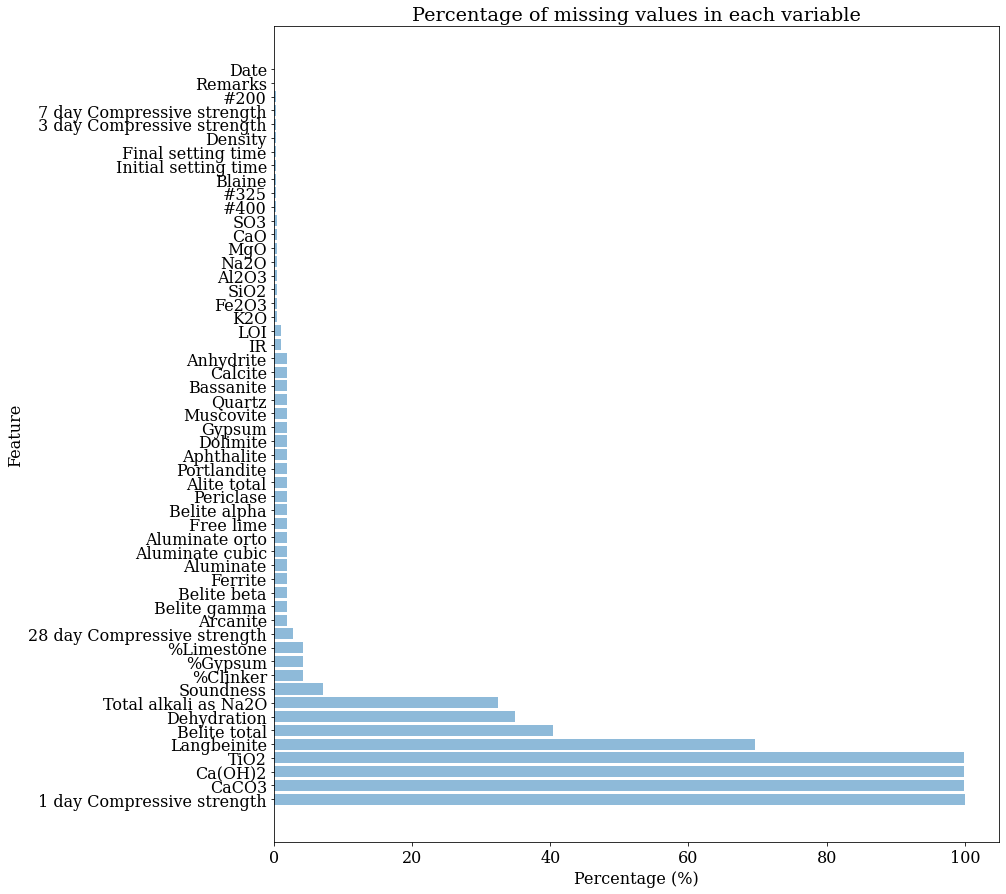

<IPython.core.display.Javascript object>

In [22]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [23]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
1 day Compressive strength,100.000000
CaCO3,99.836334
Ca(OH)2,99.836334
TiO2,99.836334
Langbeinite,69.558101
Belite total,40.425532
Dehydration,34.860884
Total alkali as Na2O,32.405892
Soundness,7.037643
%Clinker,4.255319


<IPython.core.display.Javascript object>

In [24]:
df_copy = df.copy().select_dtypes(exclude=object)
df_copy["Remarks"] = df["Remarks"].values.copy()
df_grouped = df_copy.groupby(["Remarks", "Date"]).mean()

# If we just count the daily mean by cement type, how does the missing be afterwards

(df_grouped.isna().sum() / df_grouped.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
1 day Compressive strength,100.000000
Langbeinite,73.394495
Dehydration,30.275229
Belite total,26.146789
Total alkali as Na2O,25.917431
Soundness,6.192661
%Limestone,2.522936
%Clinker,2.522936
%Gypsum,2.522936
28 day Compressive strength,2.064220


<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

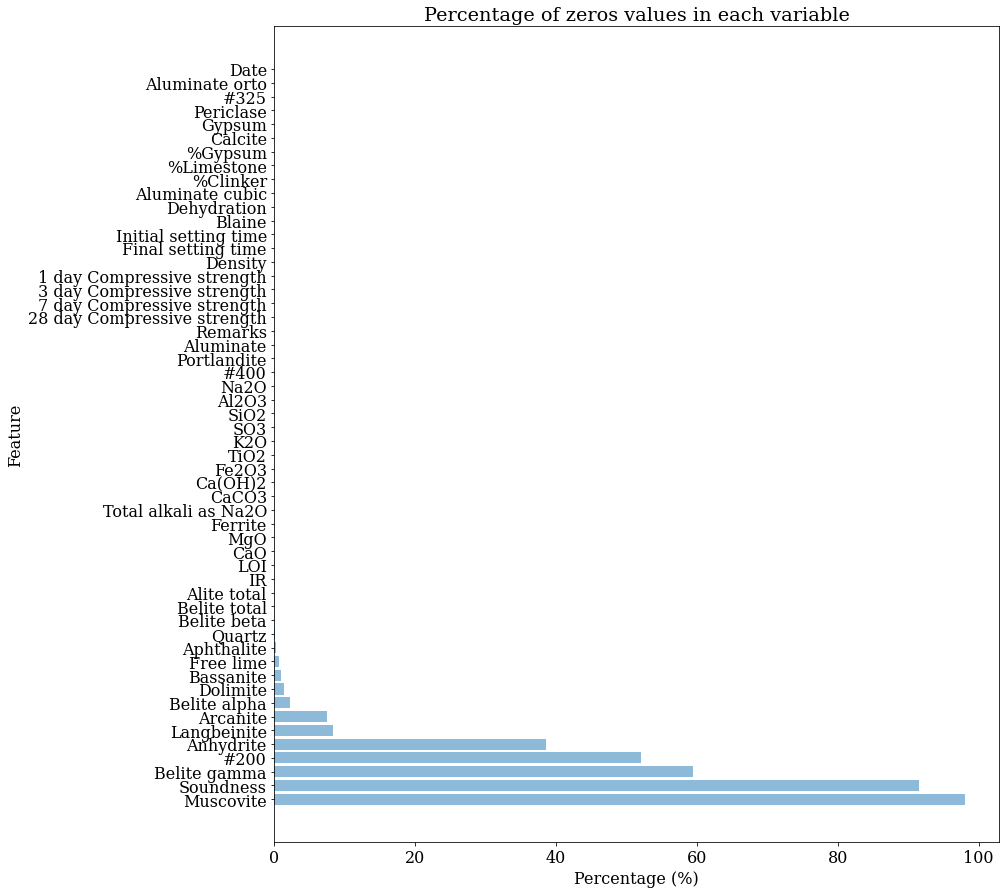

<IPython.core.display.Javascript object>

In [25]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [26]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [27]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

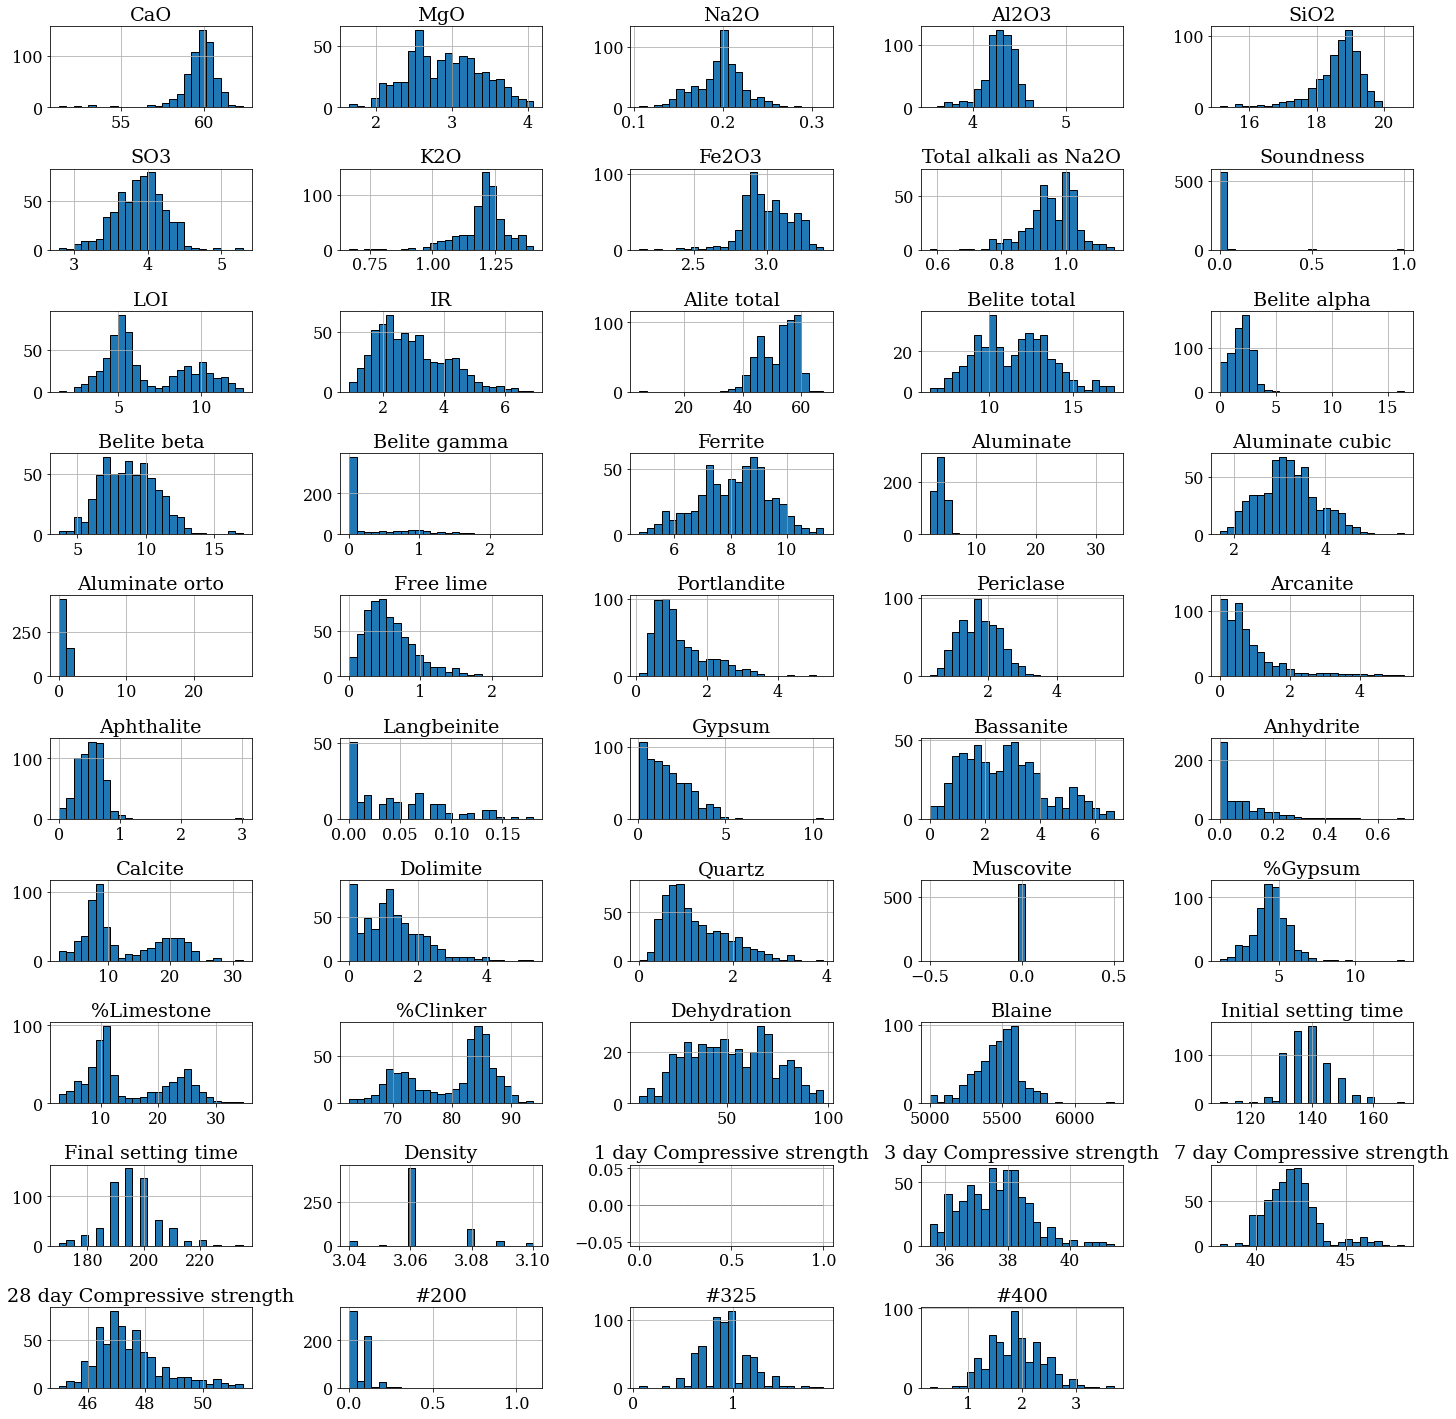

<IPython.core.display.Javascript object>

In [28]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

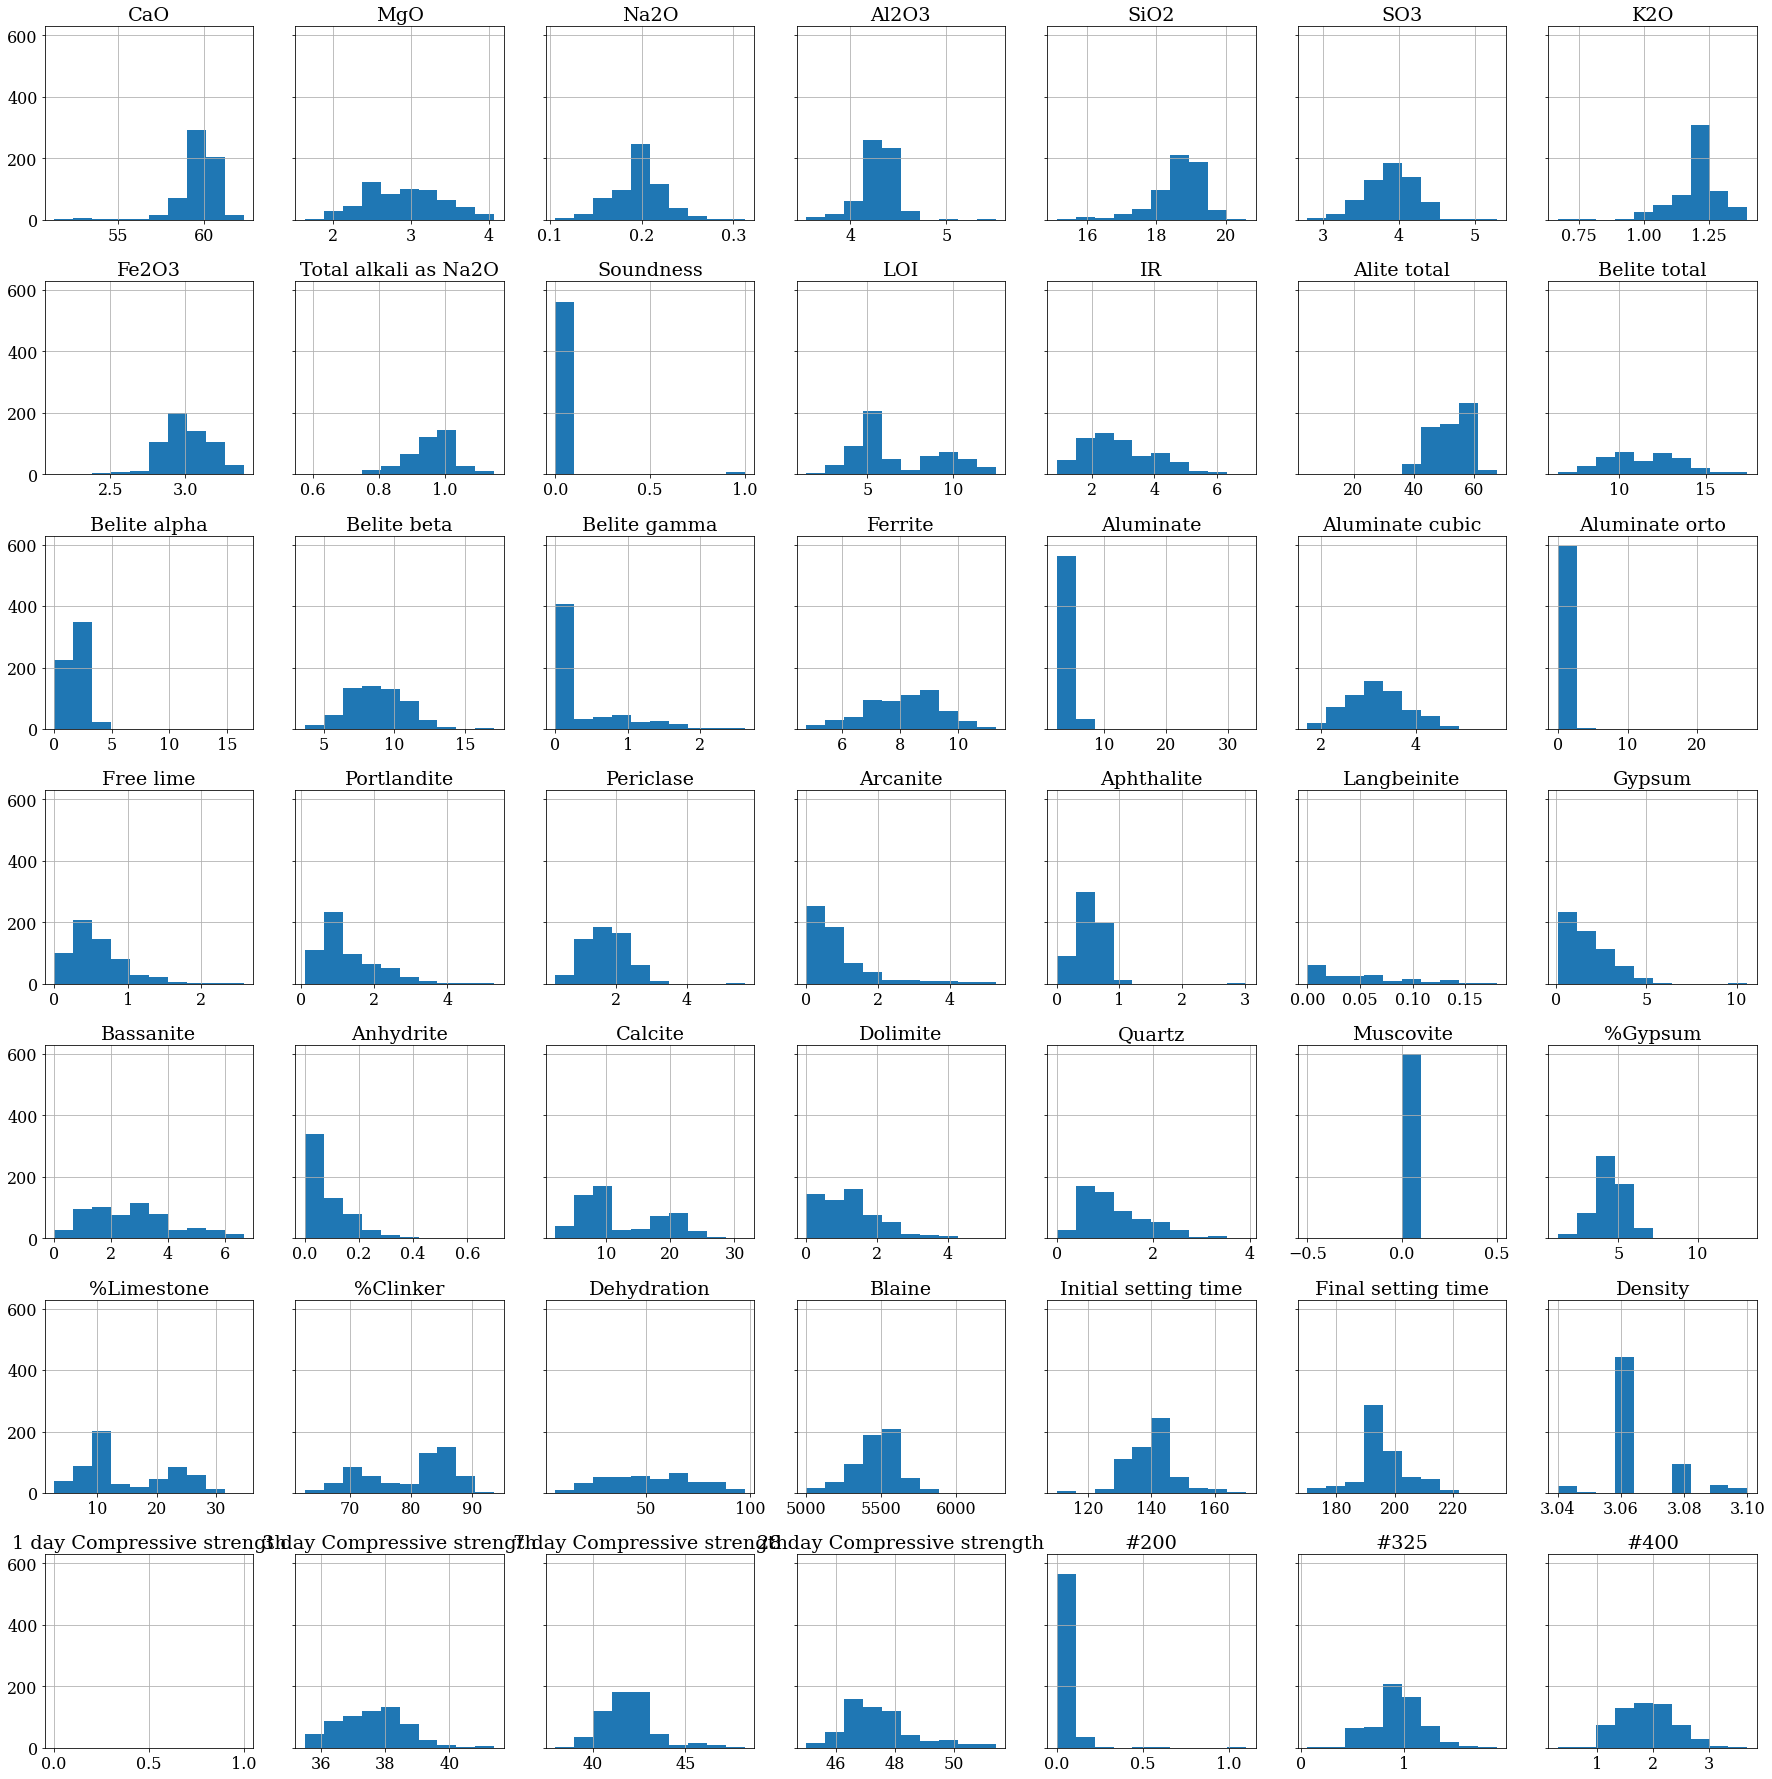

<IPython.core.display.Javascript object>

In [29]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


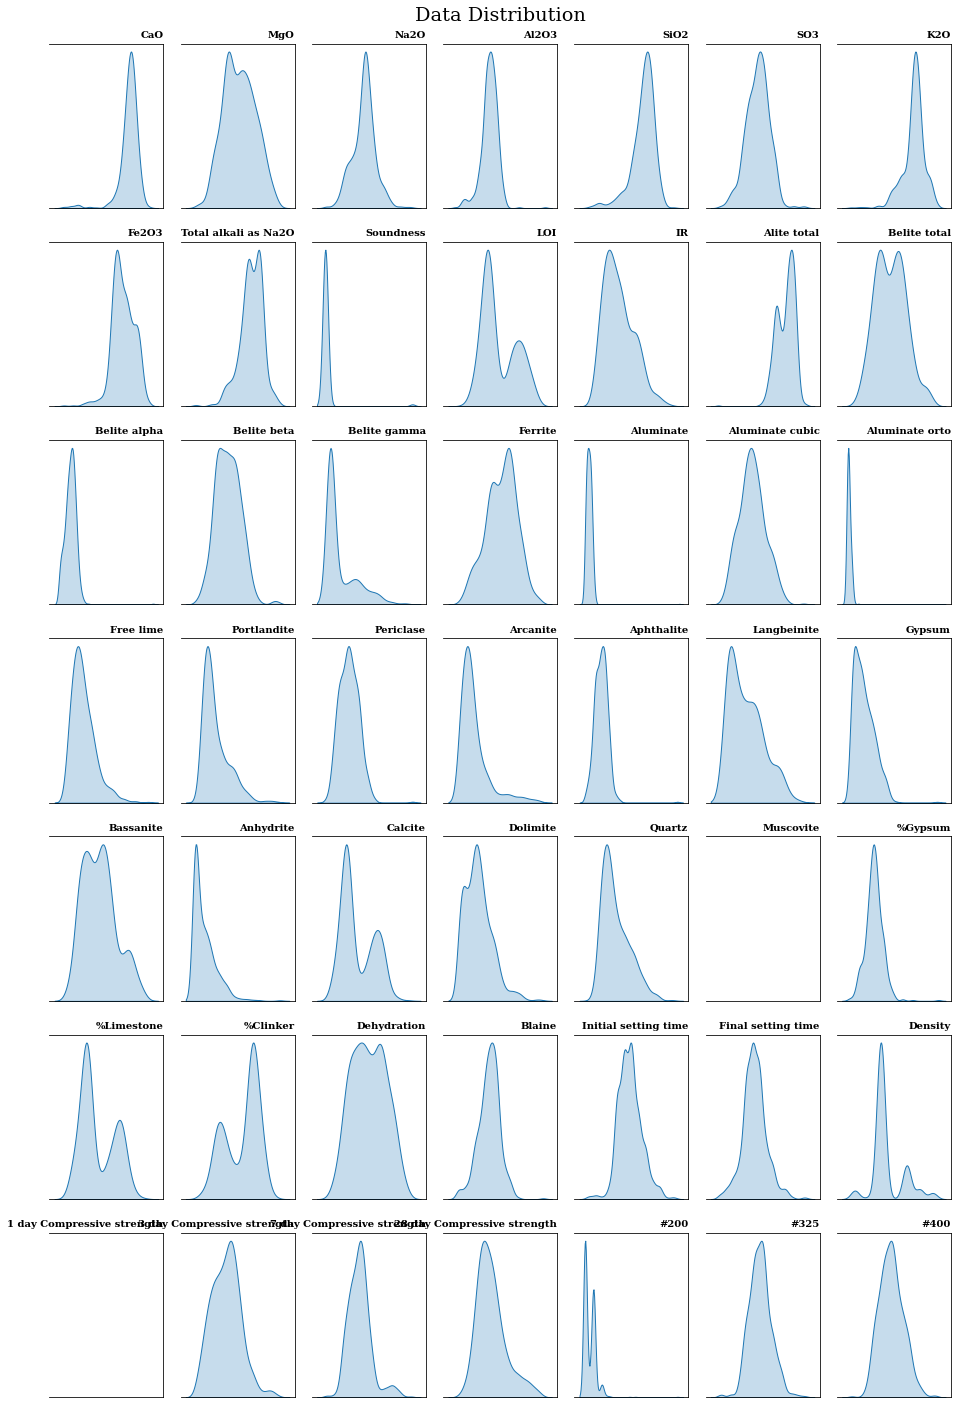

<IPython.core.display.Javascript object>

In [30]:
fig, axes = plt.subplots(7, 7, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

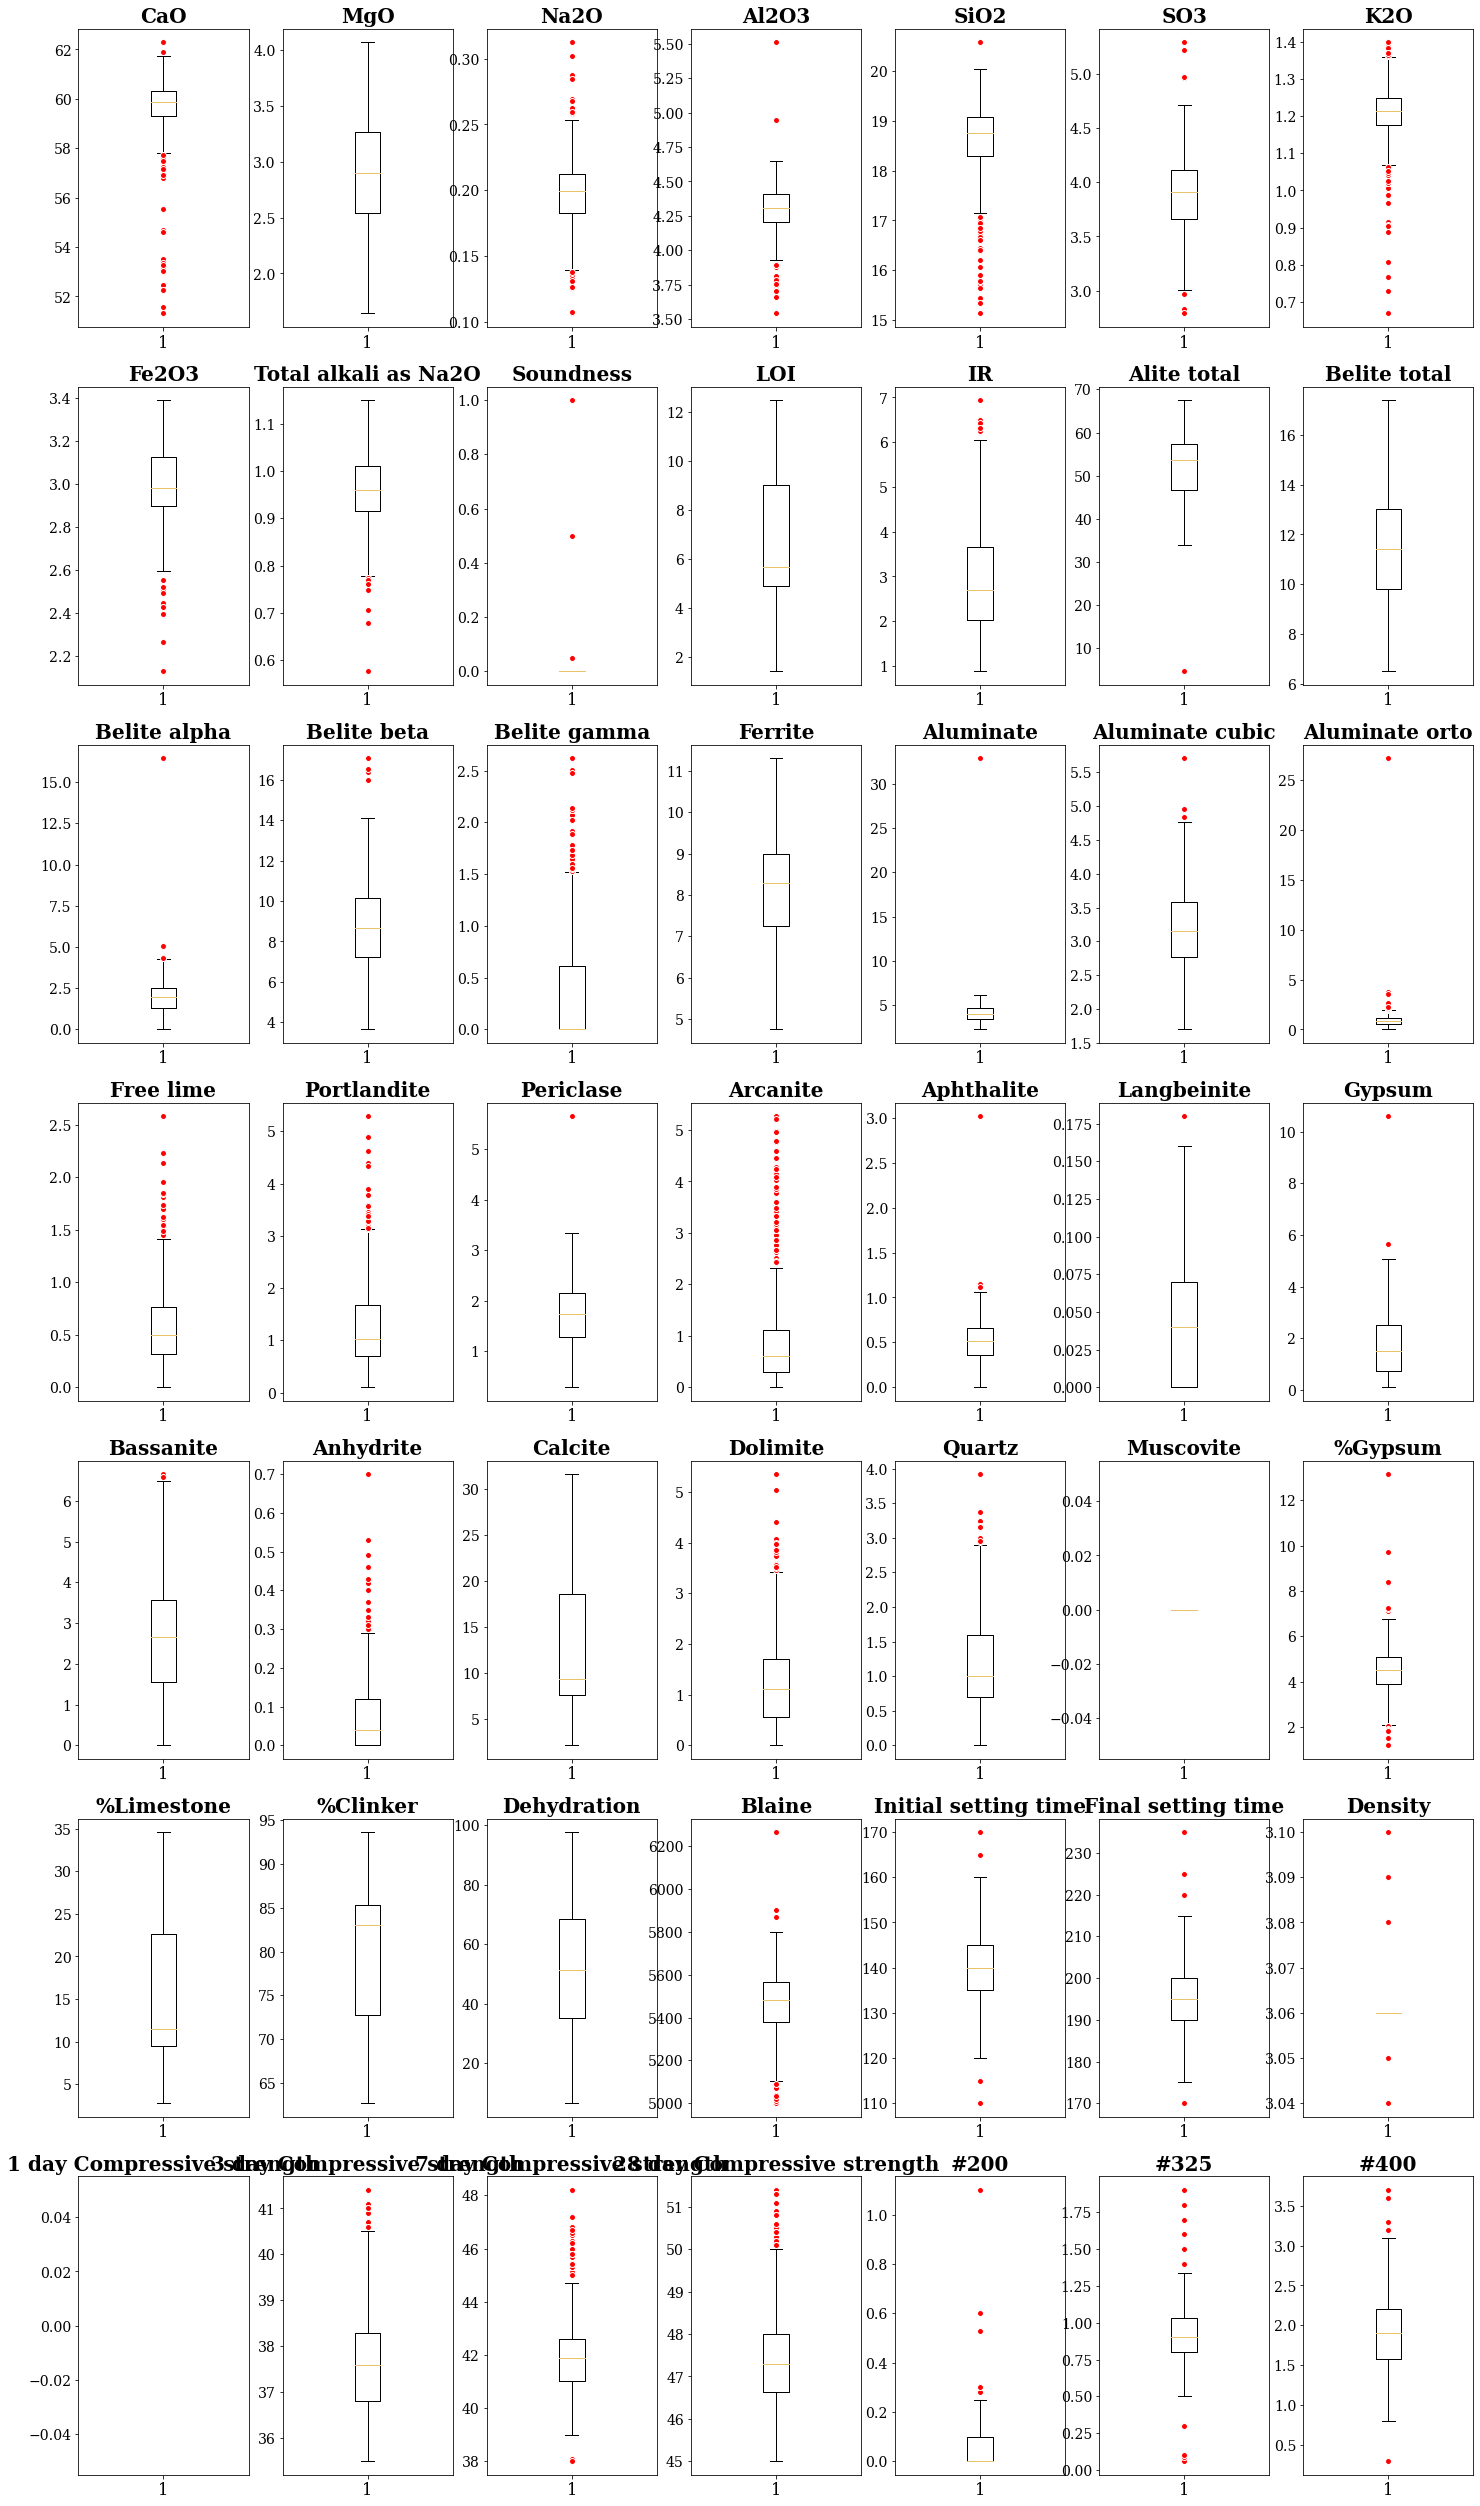

<IPython.core.display.Javascript object>

In [31]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(7, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

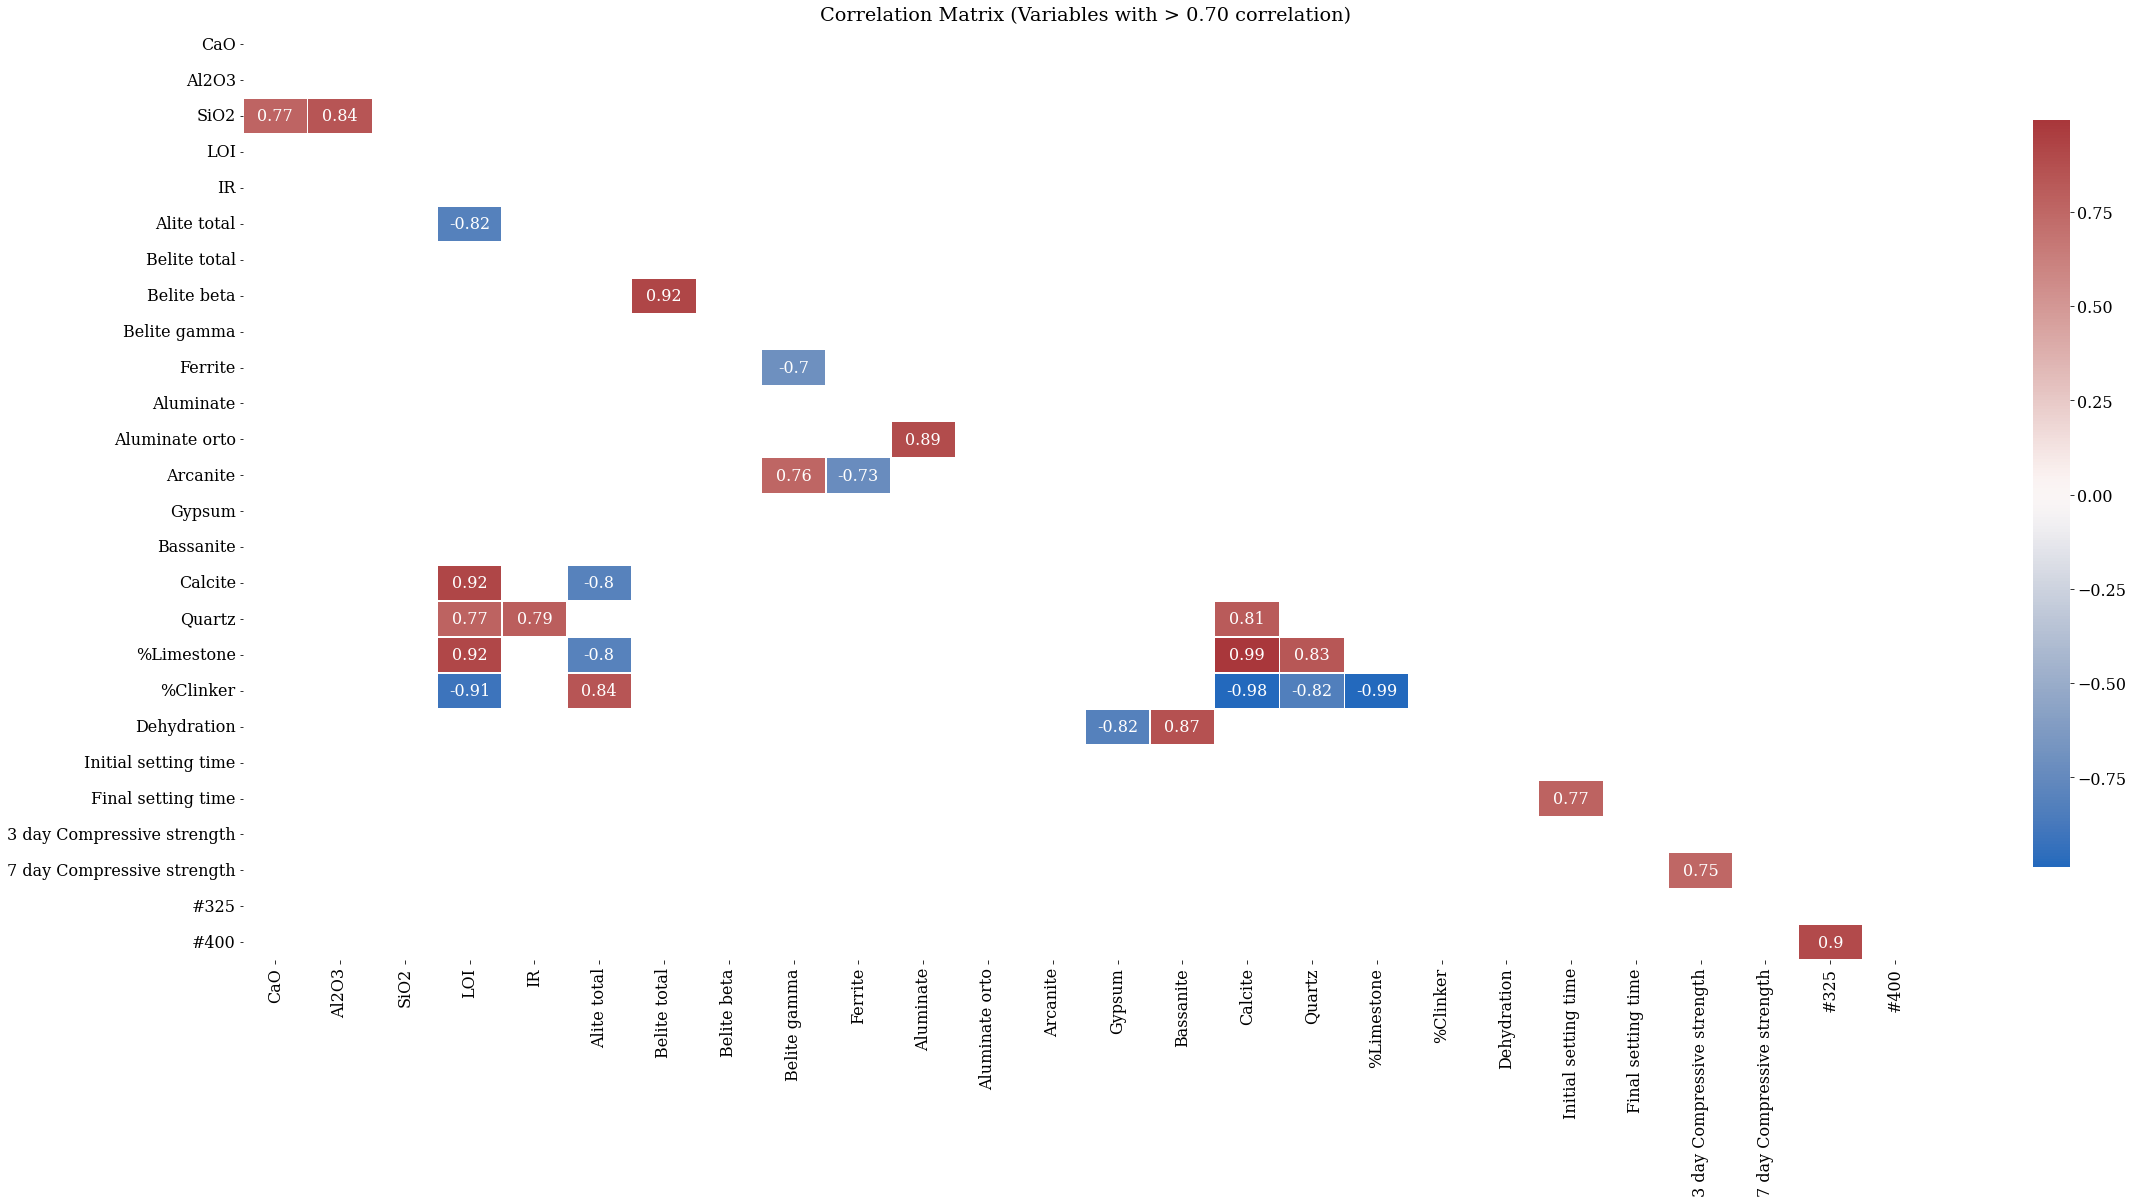

<IPython.core.display.Javascript object>

In [32]:
df_corr = df.corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [33]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                    0.993430
%Limestone                  %Clinker                      0.986842
Calcite                     %Clinker                      0.979258
Belite total                Belite beta                   0.920376
LOI                         Calcite                       0.917466
                            %Limestone                    0.916072
                            %Clinker                      0.908450
#325                        #400                          0.899673
Aluminate                   Aluminate orto                0.892342
Bassanite                   Dehydration                   0.868570
Alite total                 %Clinker                      0.841189
Al2O3                       SiO2                          0.840317
Quartz                      %Limestone                    0.832897
                            %Clinker                      0.824623
LOI                         Alite total                   0.81

<IPython.core.display.Javascript object>

In [34]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.662473
3 day Compressive strength   28 day Compressive strength    0.531977
Total alkali as Na2O         28 day Compressive strength    0.224259
Blaine                       28 day Compressive strength    0.220539
Na2O                         28 day Compressive strength    0.212026
%Gypsum                      28 day Compressive strength    0.206353
Periclase                    28 day Compressive strength    0.197078
Belite total                 28 day Compressive strength    0.190376
Aluminate cubic              28 day Compressive strength    0.170326
Bassanite                    28 day Compressive strength    0.168424
Langbeinite                  28 day Compressive strength    0.158588
SO3                          28 day Compressive strength    0.152324
Ferrite                      28 day Compressive strength    0.145665
Final setting time           28 day Compressive strength    0.142289
Aluminate                    28 da

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

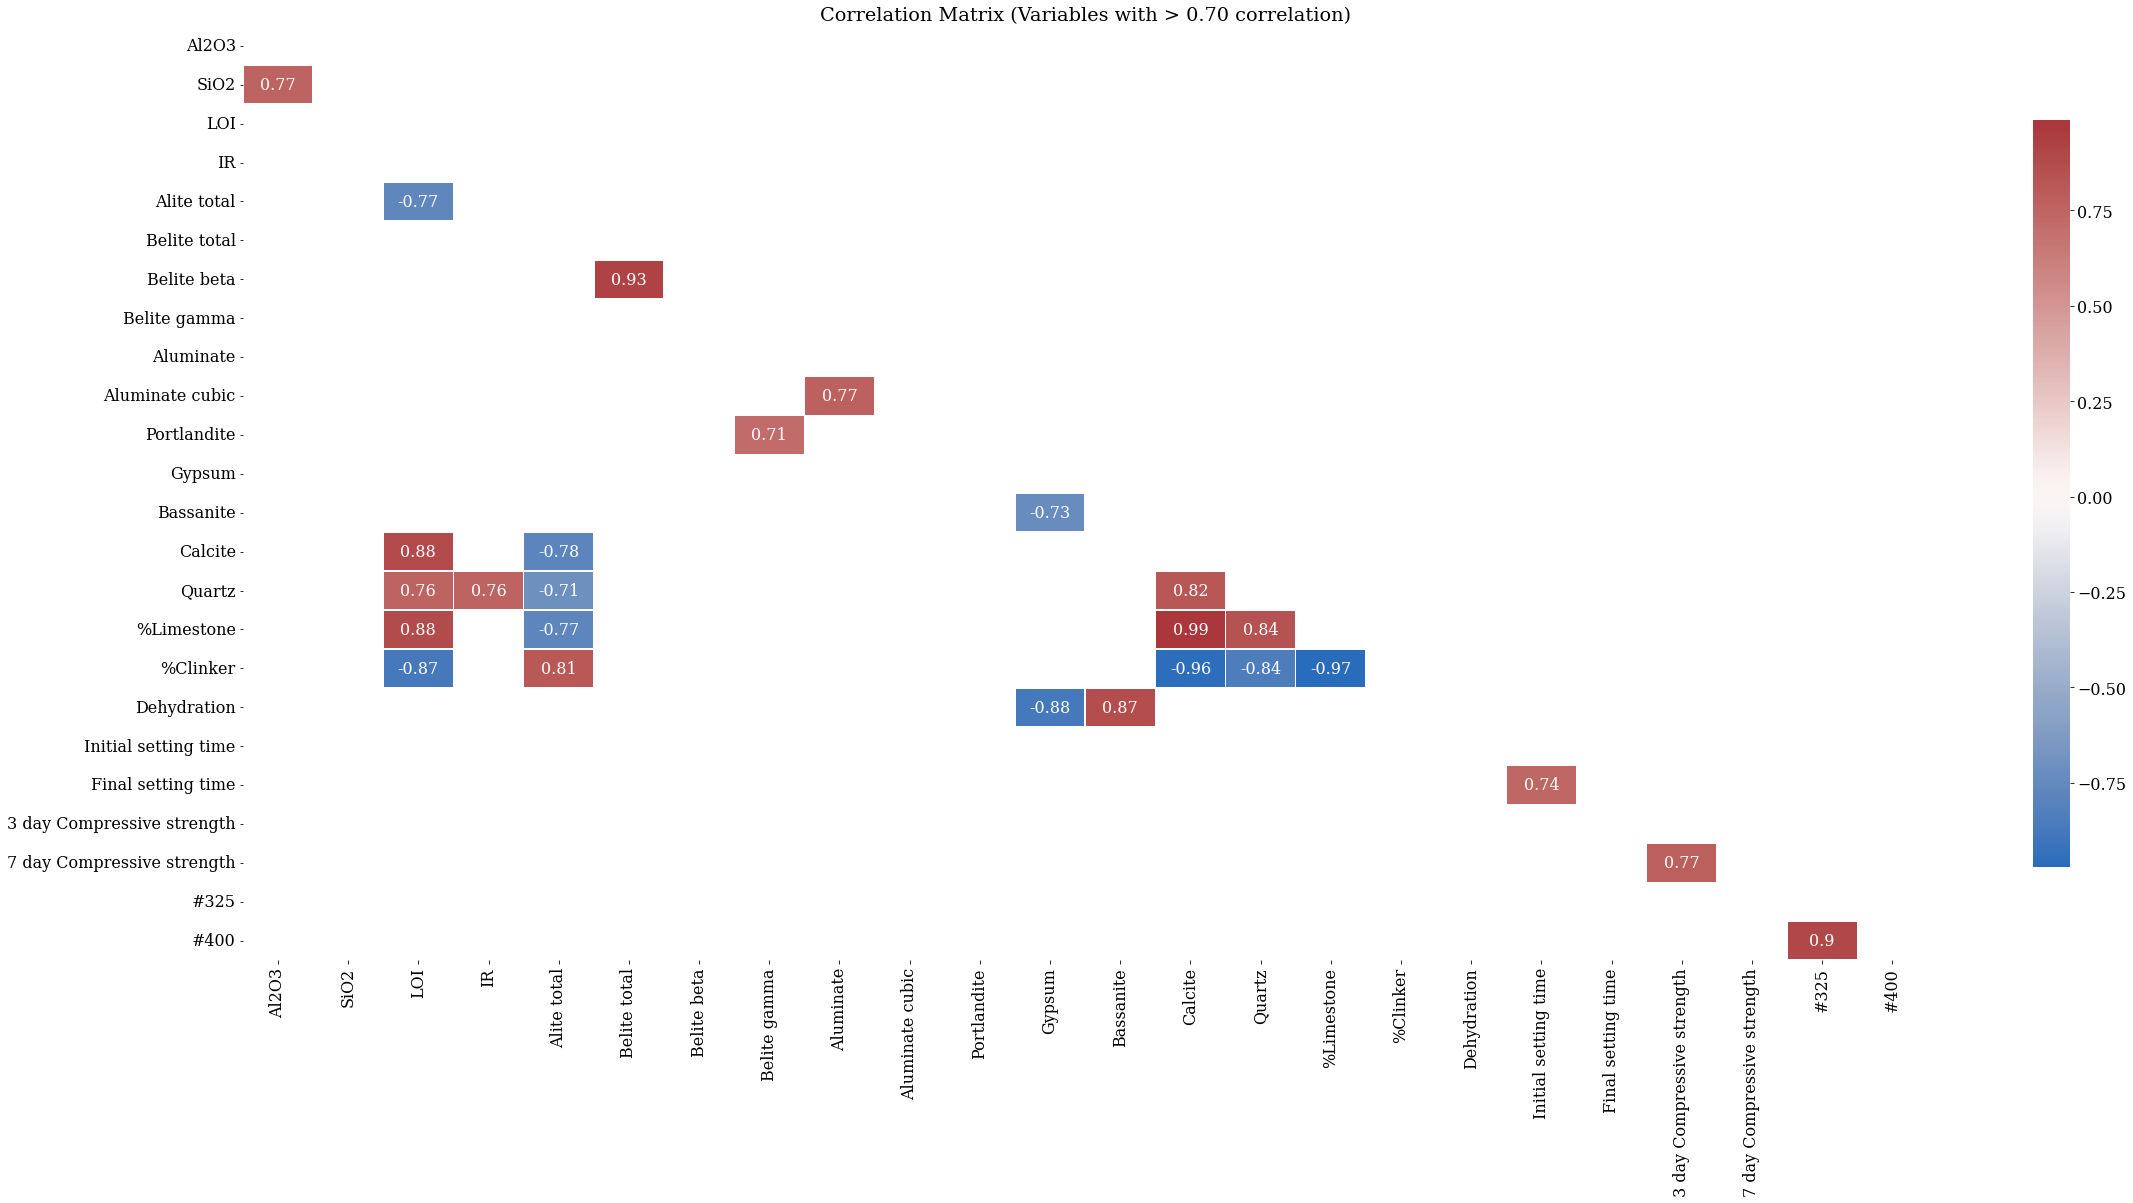

<IPython.core.display.Javascript object>

In [35]:
df_corr = df.corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [36]:
corr_matrix = df.corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                    0.987635
%Limestone                  %Clinker                      0.969986
Calcite                     %Clinker                      0.956931
Belite total                Belite beta                   0.925903
#325                        #400                          0.896784
LOI                         Calcite                       0.880787
Gypsum                      Dehydration                   0.876996
LOI                         %Limestone                    0.875044
Bassanite                   Dehydration                   0.872851
LOI                         %Clinker                      0.871236
Quartz                      %Limestone                    0.842820
                            %Clinker                      0.840156
Calcite                     Quartz                        0.819527
Alite total                 %Clinker                      0.811757
                            Calcite                       0.78

<IPython.core.display.Javascript object>

In [37]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.557468
3 day Compressive strength   28 day Compressive strength    0.472509
%Gypsum                      28 day Compressive strength    0.249014
Blaine                       28 day Compressive strength    0.227258
Aluminate                    28 day Compressive strength    0.218779
Periclase                    28 day Compressive strength    0.199426
Total alkali as Na2O         28 day Compressive strength    0.182935
Aluminate cubic              28 day Compressive strength    0.178590
Final setting time           28 day Compressive strength    0.176784
K2O                          28 day Compressive strength    0.171528
Initial setting time         28 day Compressive strength    0.169215
%Limestone                   28 day Compressive strength    0.167038
Belite total                 28 day Compressive strength    0.166628
Langbeinite                  28 day Compressive strength    0.165093
Calcite                      28 da

<IPython.core.display.Javascript object>

<h4>3.3.3 Kendall</h4>

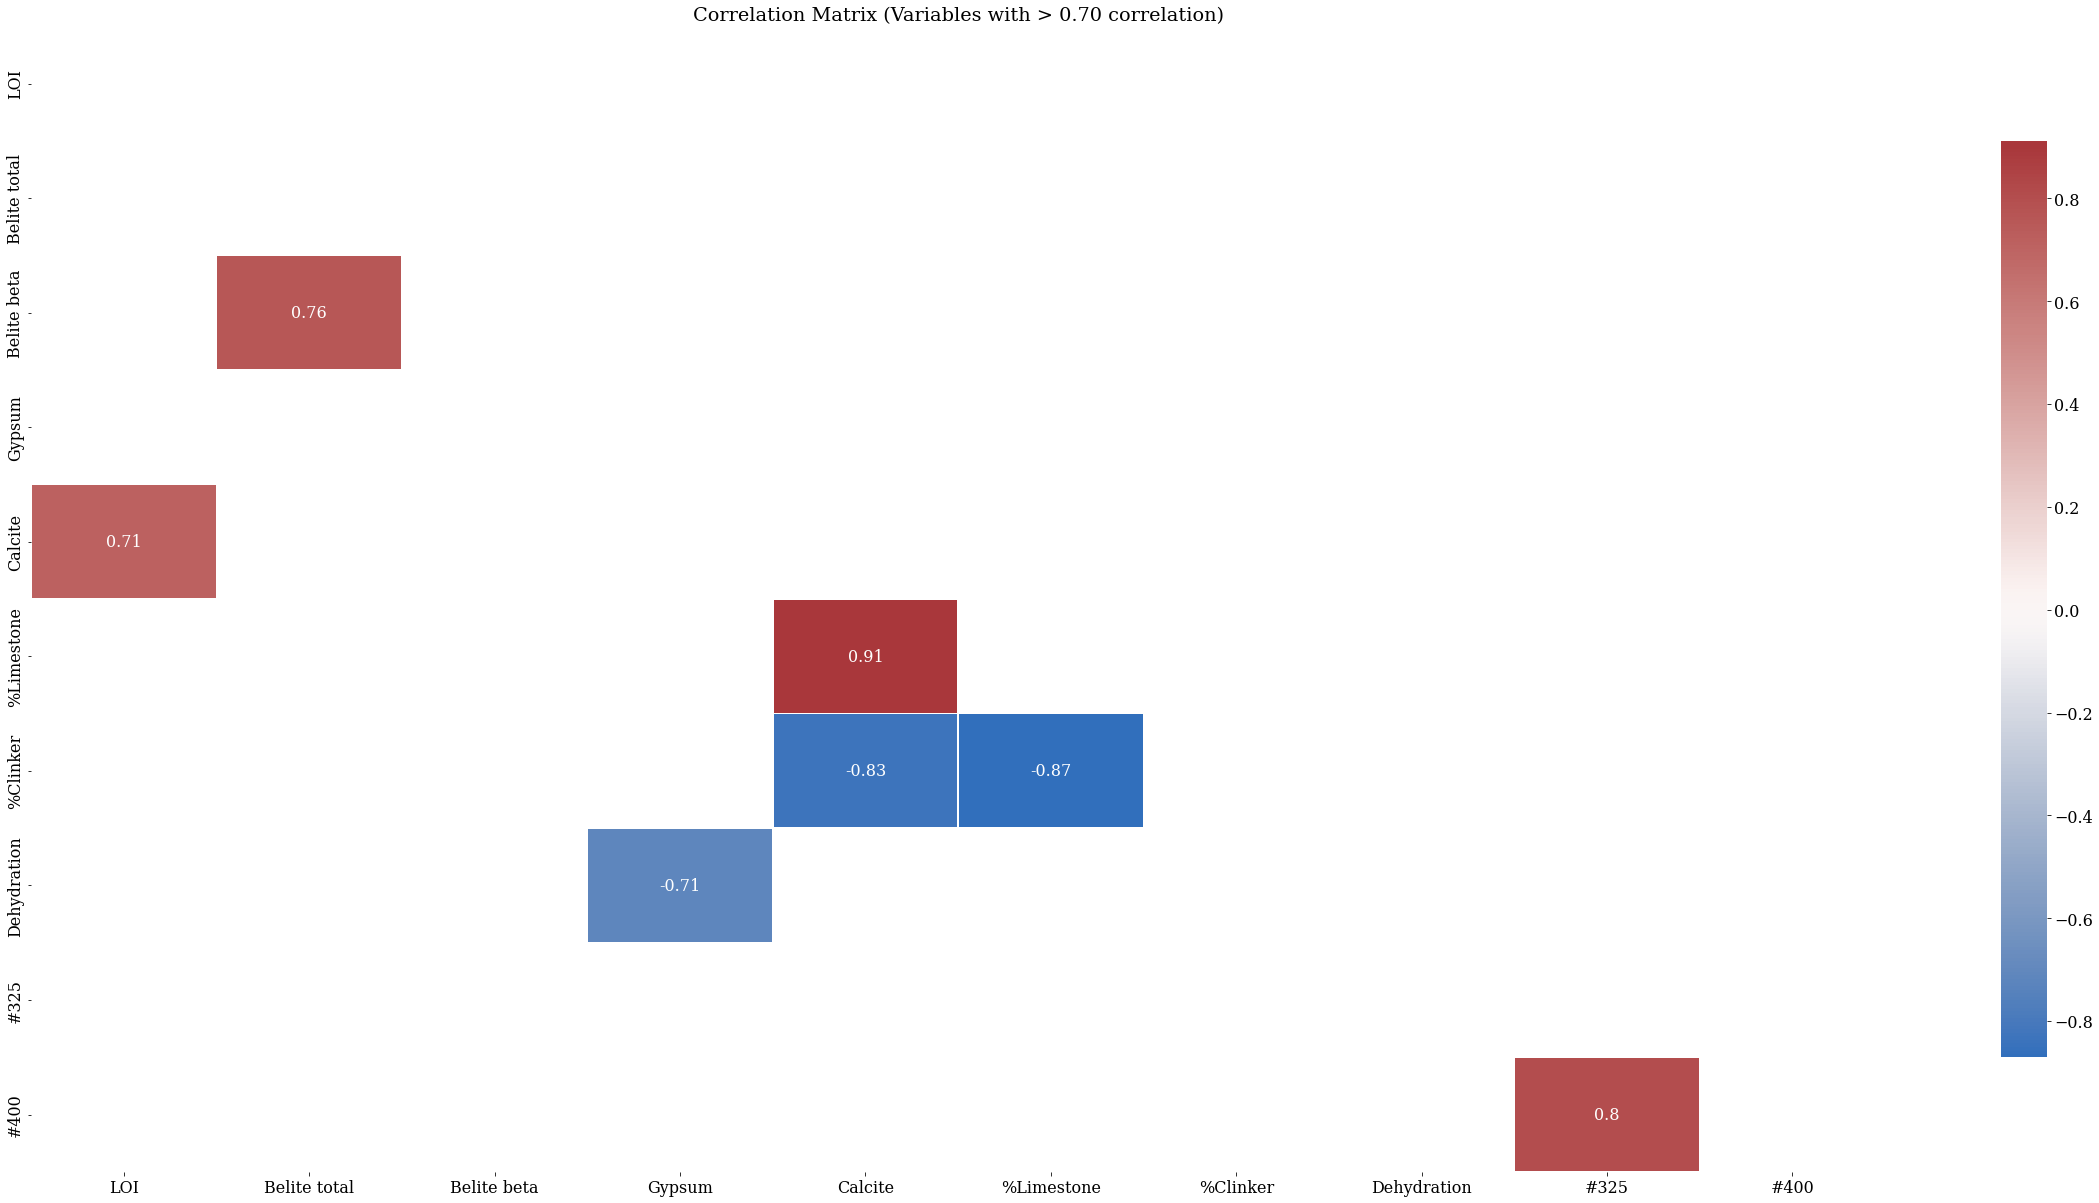

<IPython.core.display.Javascript object>

In [38]:
df_corr = df.corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [39]:
corr_matrix = df.corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite       %Limestone     0.911679
%Limestone    %Clinker       0.870242
Calcite       %Clinker       0.833274
#325          #400           0.804867
Belite total  Belite beta    0.761119
Gypsum        Dehydration    0.711150
LOI           Calcite        0.710678
dtype: float64

<IPython.core.display.Javascript object>

In [40]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.408801
3 day Compressive strength   28 day Compressive strength    0.342007
%Gypsum                      28 day Compressive strength    0.164069
Blaine                       28 day Compressive strength    0.159179
Aluminate                    28 day Compressive strength    0.148207
Periclase                    28 day Compressive strength    0.136628
Final setting time           28 day Compressive strength    0.127897
Initial setting time         28 day Compressive strength    0.123435
Total alkali as Na2O         28 day Compressive strength    0.120926
Langbeinite                  28 day Compressive strength    0.120904
Aluminate cubic              28 day Compressive strength    0.118361
Belite total                 28 day Compressive strength    0.112722
K2O                          28 day Compressive strength    0.111647
%Limestone                   28 day Compressive strength    0.109742
Calcite                      28 da

<IPython.core.display.Javascript object>

#### Bivariate Analysis

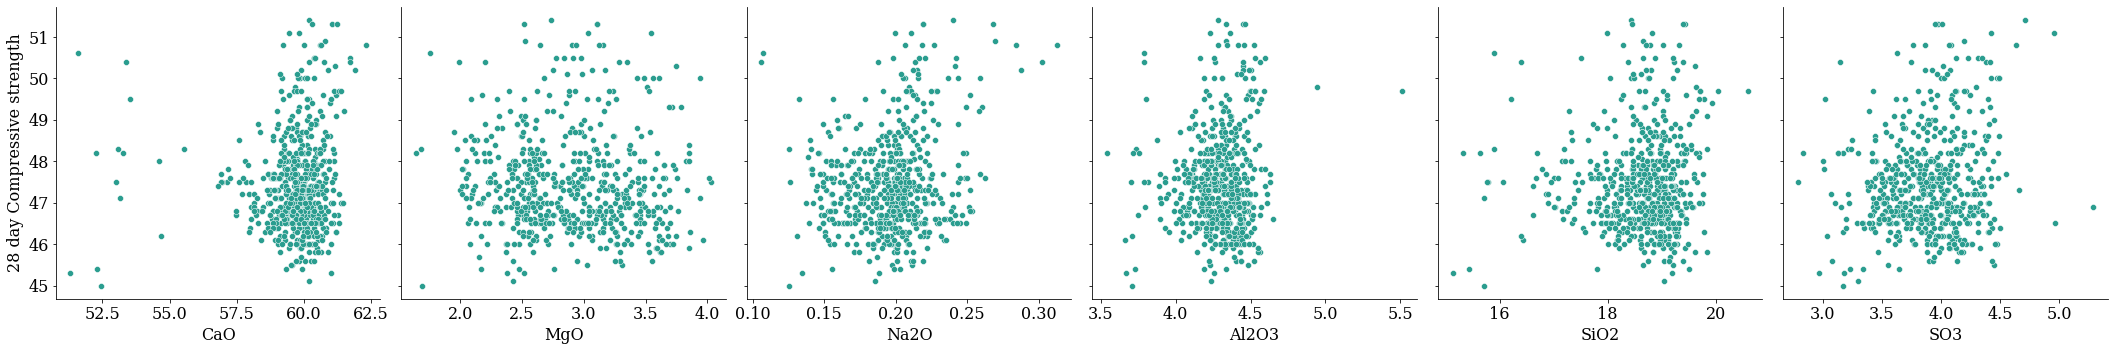

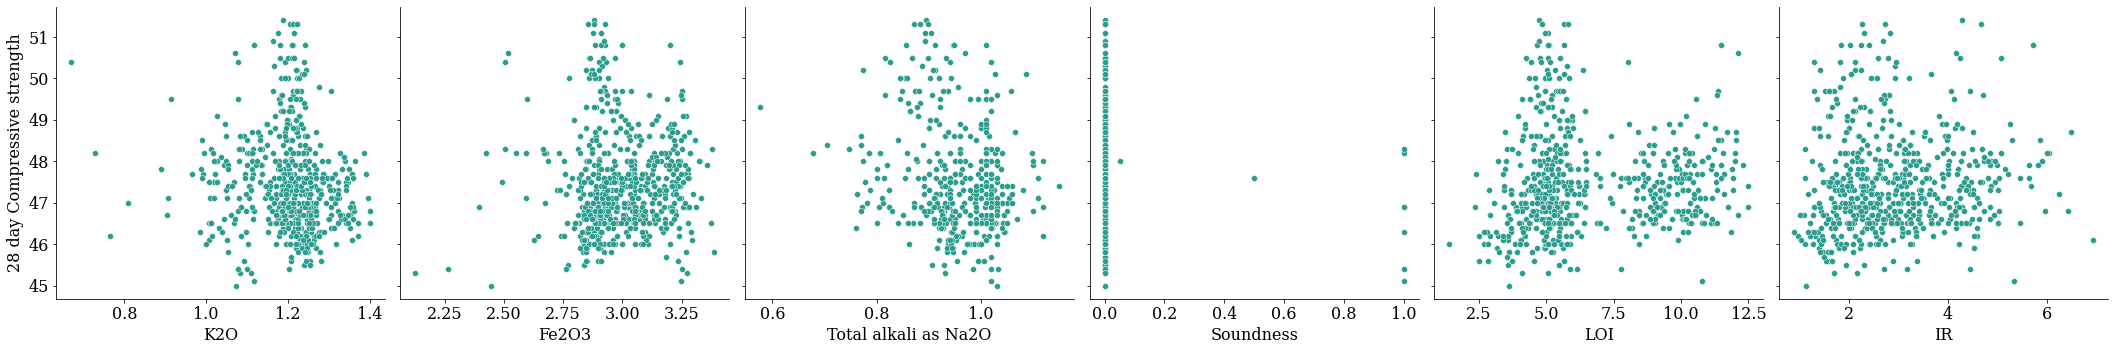

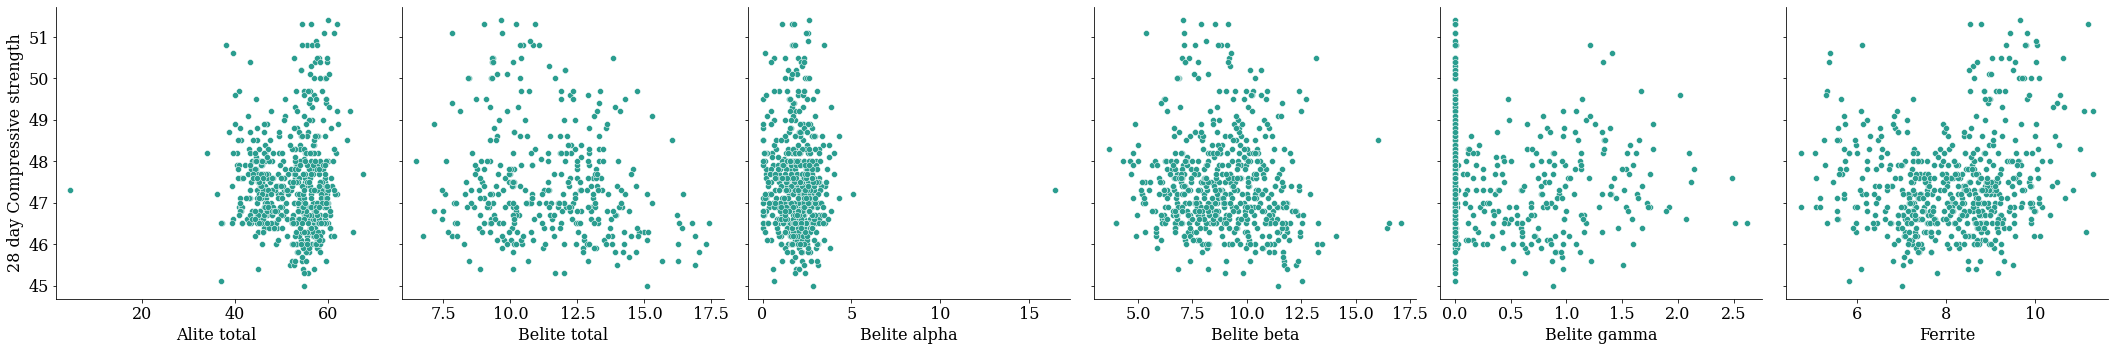

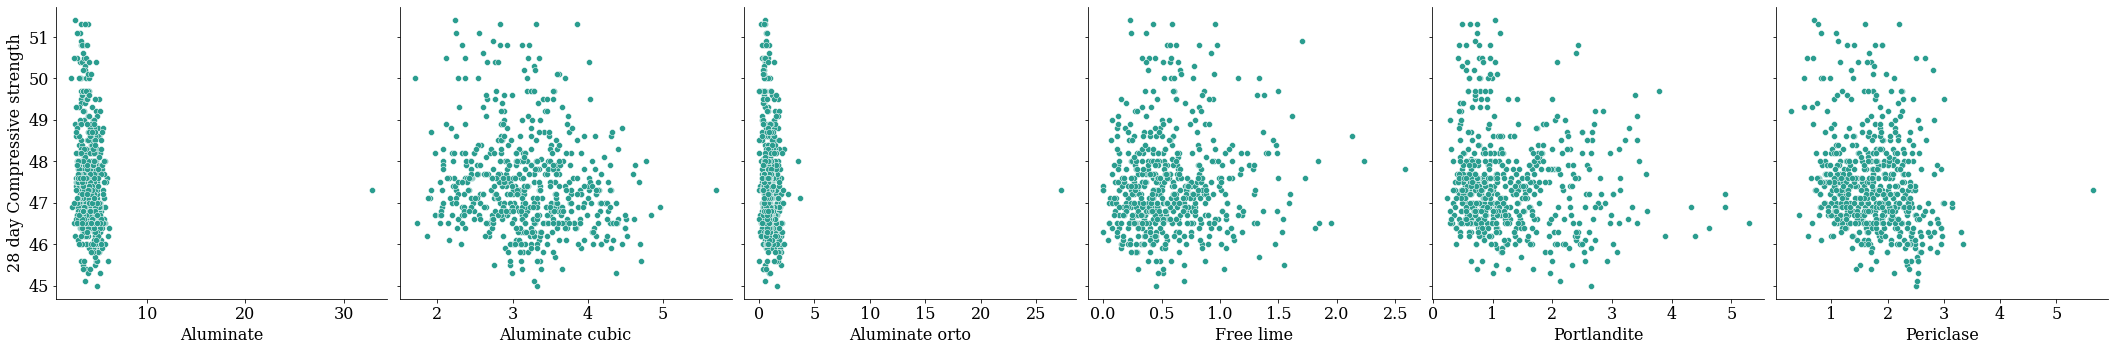

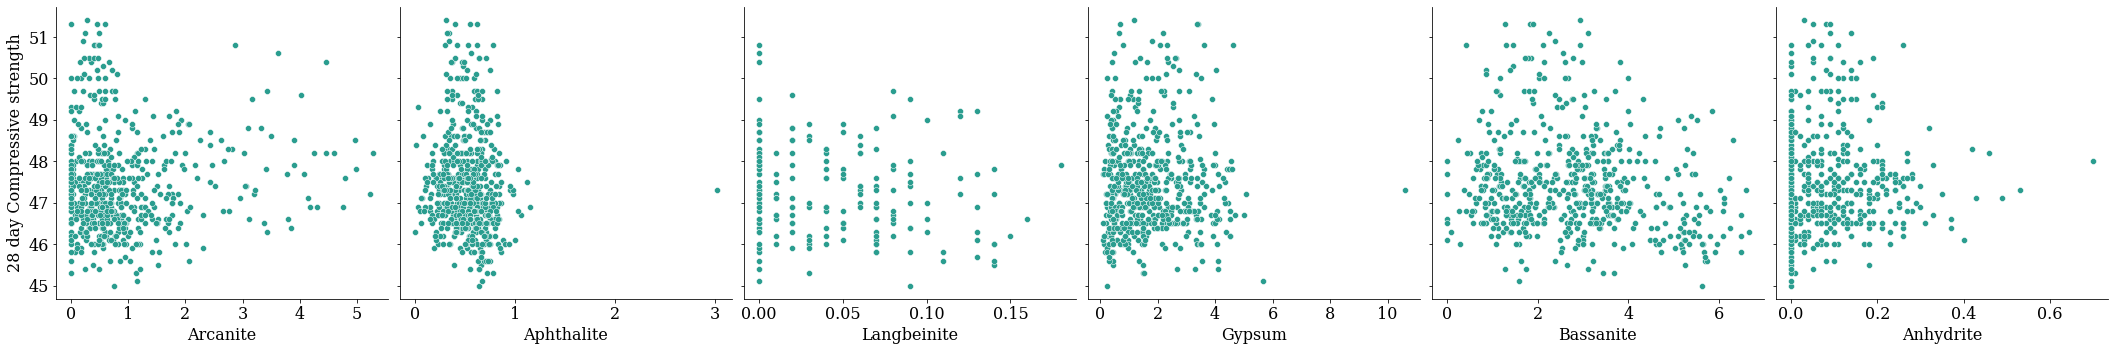

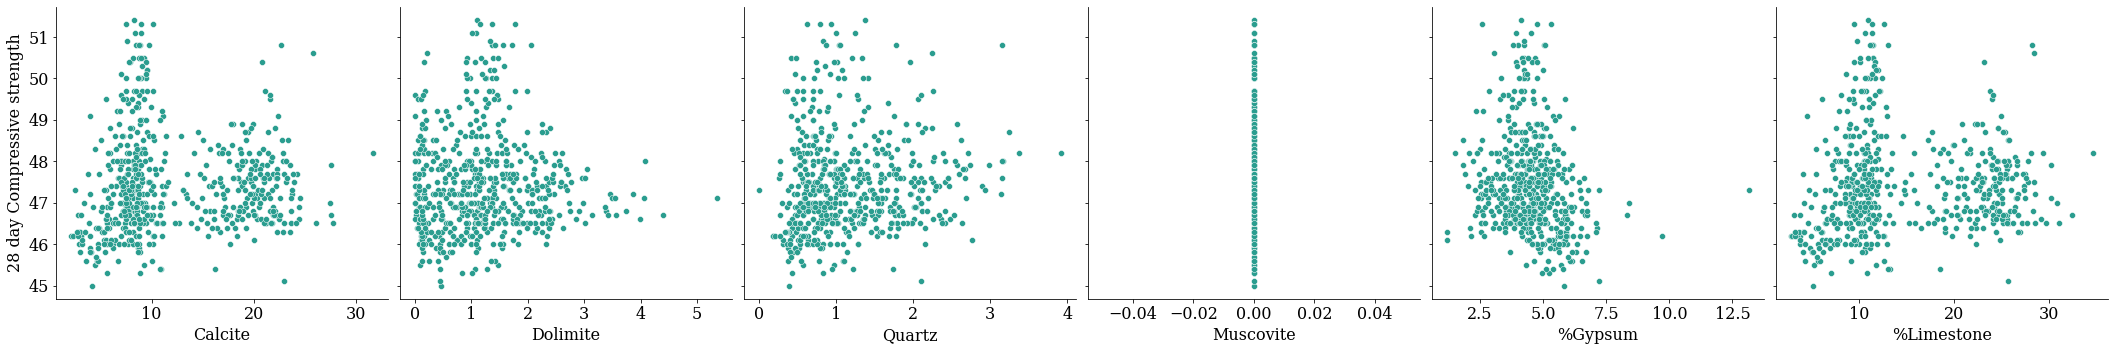

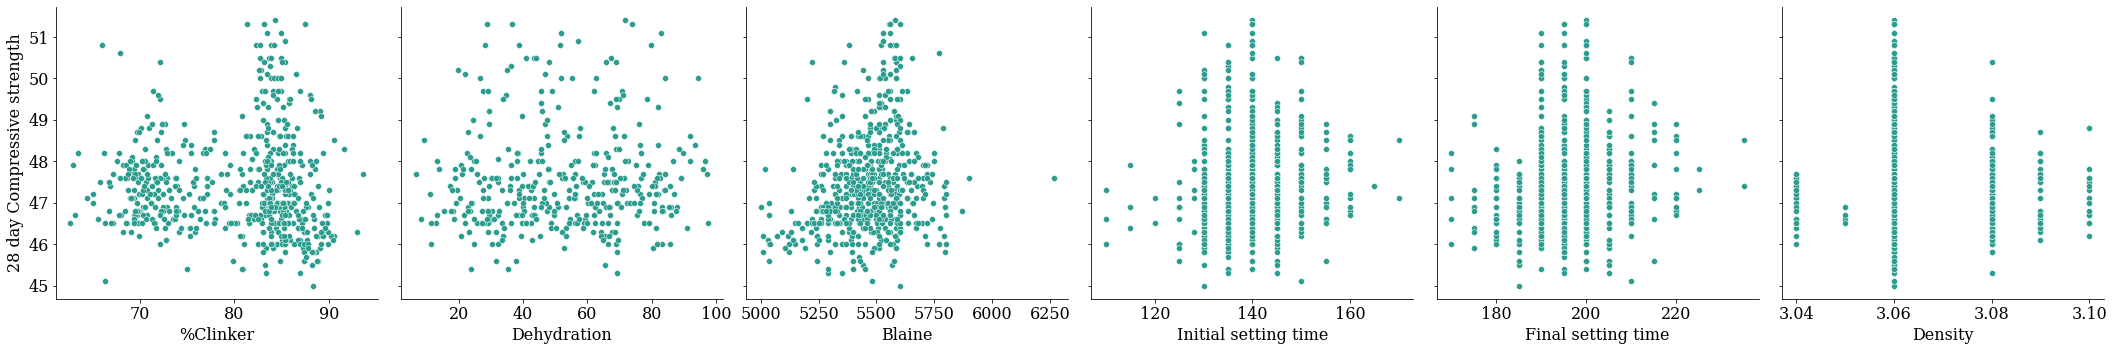

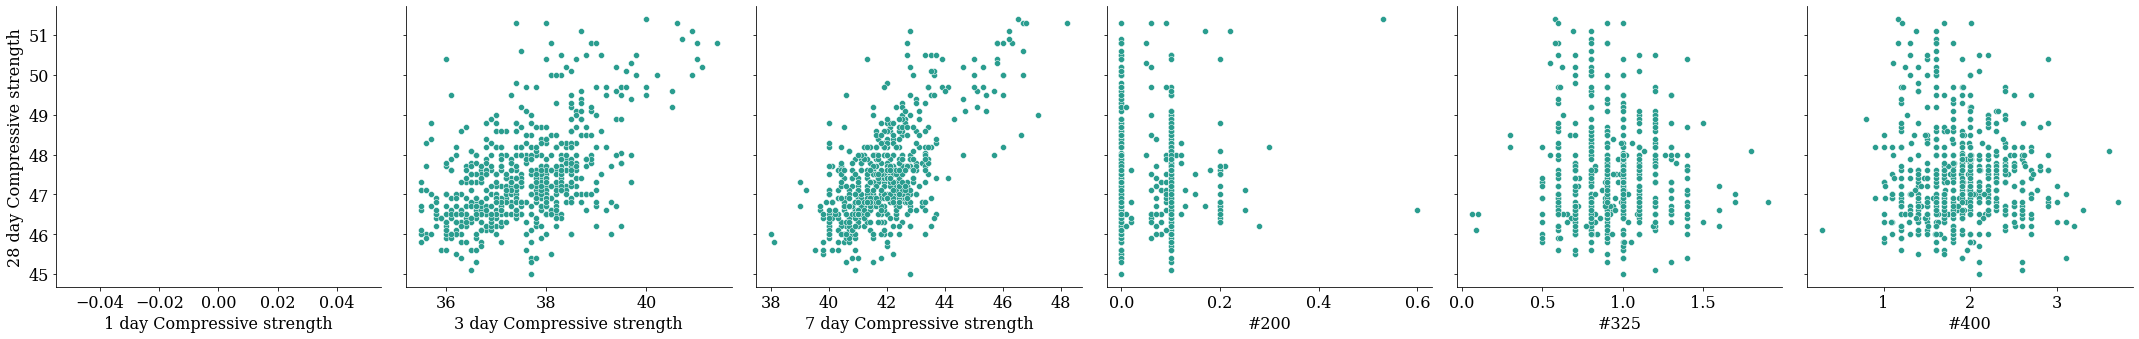

<IPython.core.display.Javascript object>

In [41]:
num_lines = 8
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 day Compressive strength")
variables_to_plot.remove("Date")

num_lines = 8
plots_per_line = 6

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 day Compressive strength"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

plt.tight_layout()
plt.show()

In [42]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

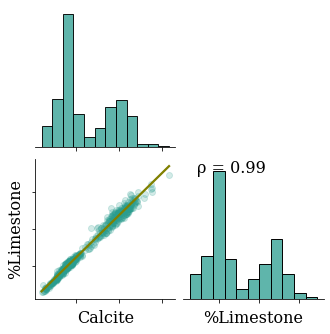

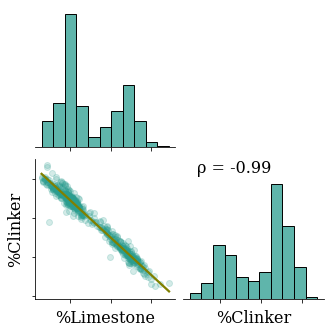

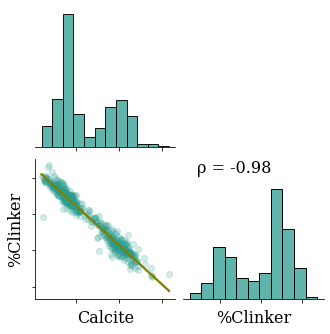

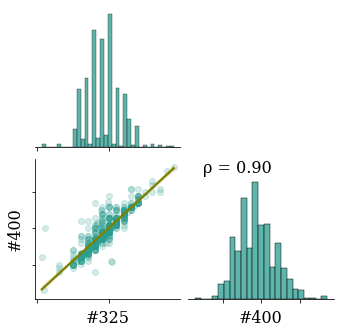

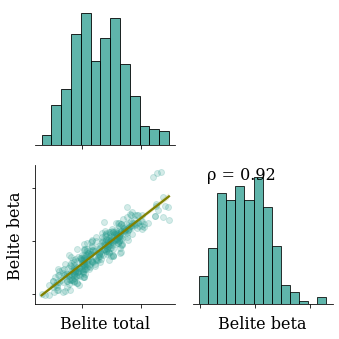

<IPython.core.display.Javascript object>

In [43]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [44]:
dates = df["Date"]
dates

0     2020-01-02
1     2020-01-06
2     2020-01-09
3     2020-01-14
4     2020-01-17
         ...    
606   2022-04-16
607   2022-04-19
608   2022-04-25
609   2022-04-27
610   2022-05-02
Name: Date, Length: 611, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [45]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

398 valid days out of 436


<IPython.core.display.Javascript object>

In [46]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [47]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5}}

<IPython.core.display.Javascript object>

In [48]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        18
      2        18
      3        16
      4        15
      5        18
      6        22
      7        19
      8        20
      9        20
      10       22
      11       18
      12       13
2021  1        14
      2        12
      3        15
      4        12
      5        12
      6        15
      7        14
      8        14
      9        15
      10       11
      11       12
      12       11
2022  1        16
      2        14
      3        14
      4        15
      5         1
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

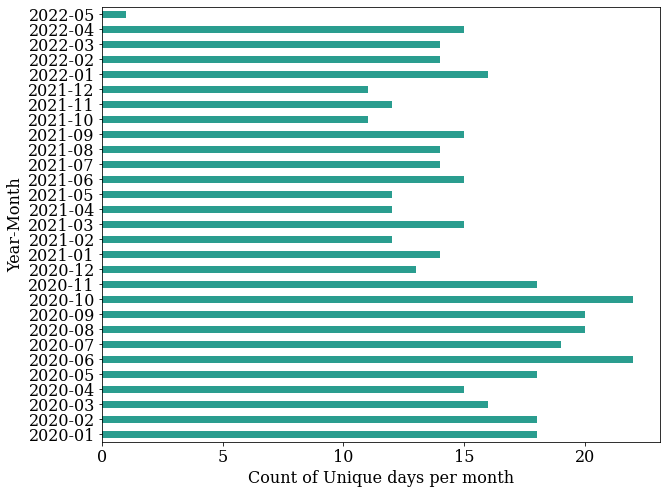

<IPython.core.display.Javascript object>

In [49]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [50]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        29
      2        30
      3        25
      4        20
      5        33
      6        33
      7        31
      8        32
      9        33
      10       34
      11       29
      12       16
2021  1        16
      2        15
      3        16
      4        14
      5        15
      6        17
      7        17
      8        17
      9        17
      10       12
      11       15
      12       16
2022  1        19
      2        21
      3        18
      4        19
      5         2
Name: size, dtype: int64


<IPython.core.display.Javascript object>

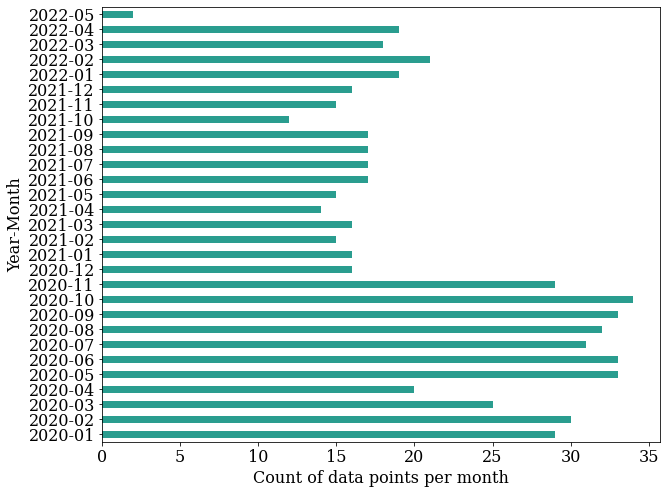

<IPython.core.display.Javascript object>

In [51]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [52]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-5 has the minimum number of days with samples - 2
2020-10 has the maximum number of days with samples - 34


<IPython.core.display.Javascript object>

In [53]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 28, 2021: 15, 2022: 15}

Mean number of observations - all years
21


<IPython.core.display.Javascript object>

In [54]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

,DayCount
count,436.000000
mean,1.401376
std,0.604122
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


<IPython.core.display.Javascript object>

In [55]:
day_counts[["DayCount"]].value_counts()

DayCount
1           288
2           121
3            27
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

,Year,Month,Day,DayCount
5,2020,1,9,3
7,2020,1,14,3
9,2020,1,17,3
21,2020,2,5,3
46,2020,3,19,3
53,2020,4,2,3
67,2020,5,4,3
71,2020,5,11,3
74,2020,5,15,3
79,2020,5,22,3


<IPython.core.display.Javascript object>

In [57]:
df_copy = df.copy()
df_copy["Year"] = df_copy["Date"].dt.year
df_copy["Month"] = df_copy["Date"].dt.month
df_copy["Day"] = df_copy["Date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = (
        df_merge[df_merge["DayCount"] == daycount]["28 day Compressive strength"]
        .isna()
        .sum()
    )
    print(daycount, nulls)

1 9
2 7
3 1


<IPython.core.display.Javascript object>

In [58]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])

# Average Frequency
np.mean(diffs)

Timedelta('1 days 09:28:55.081967213')

<IPython.core.display.Javascript object>

In [59]:
Counter(diffs)

Counter({Timedelta('4 days 00:00:00'): 112,
         Timedelta('3 days 00:00:00'): 108,
         Timedelta('5 days 00:00:00'): 100,
         Timedelta('1 days 00:00:00'): 107,
         Timedelta('6 days 00:00:00'): 38,
         Timedelta('8 days 00:00:00'): 9,
         Timedelta('2 days 00:00:00'): 93,
         Timedelta('7 days 00:00:00'): 25,
         Timedelta('-850 days +00:00:00'): 1,
         Timedelta('13 days 00:00:00'): 2,
         Timedelta('9 days 00:00:00'): 1,
         Timedelta('133 days 00:00:00'): 1,
         Timedelta('68 days 00:00:00'): 1,
         Timedelta('41 days 00:00:00'): 1,
         Timedelta('14 days 00:00:00'): 2,
         Timedelta('16 days 00:00:00'): 2,
         Timedelta('98 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 2,
         Timedelta('10 days 00:00:00'): 2,
         Timedelta('-829 days +00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 1})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count'>

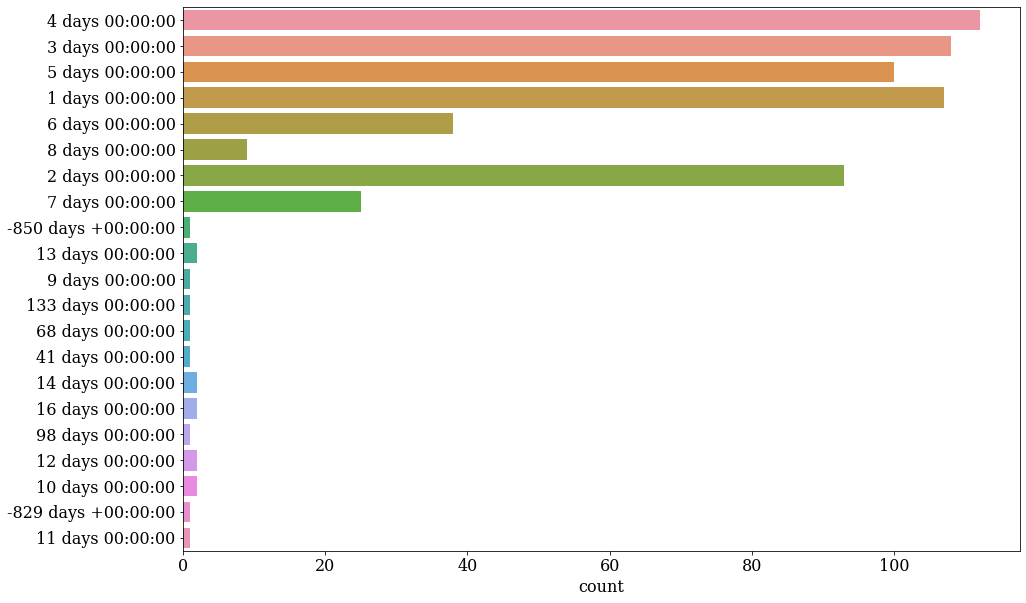

<IPython.core.display.Javascript object>

In [60]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [61]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[18.33,
 17.68,
 16.37,
 17.51,
 6.22,
 1.47,
 15.22,
 4.09,
 0.16,
 0.33,
 0.16,
 0.16,
 0.16,
 0.16,
 0.33,
 0.33,
 0.16,
 0.33,
 0.33,
 0.16,
 0.16]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 3 Days

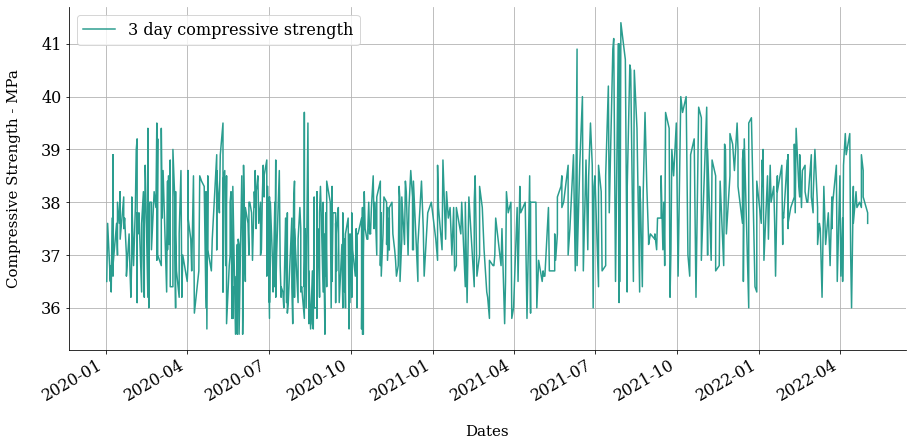

<IPython.core.display.Javascript object>

In [62]:
tmp = df[["Date", "3 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

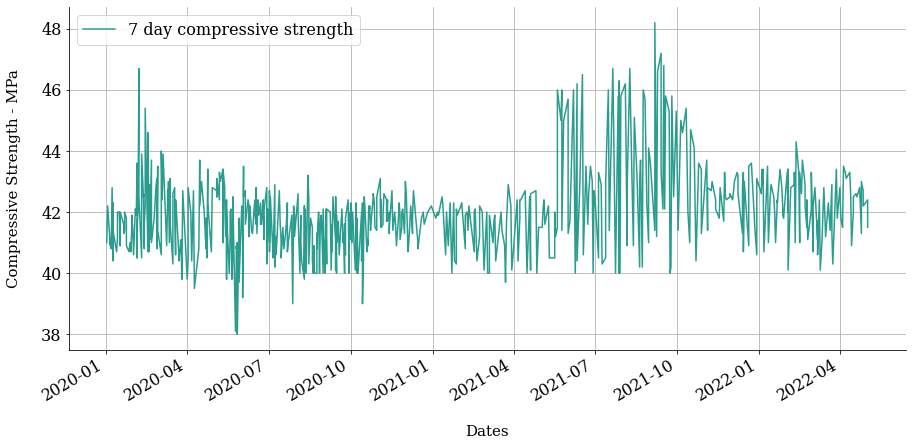

<IPython.core.display.Javascript object>

In [63]:
tmp = df[["Date", "7 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

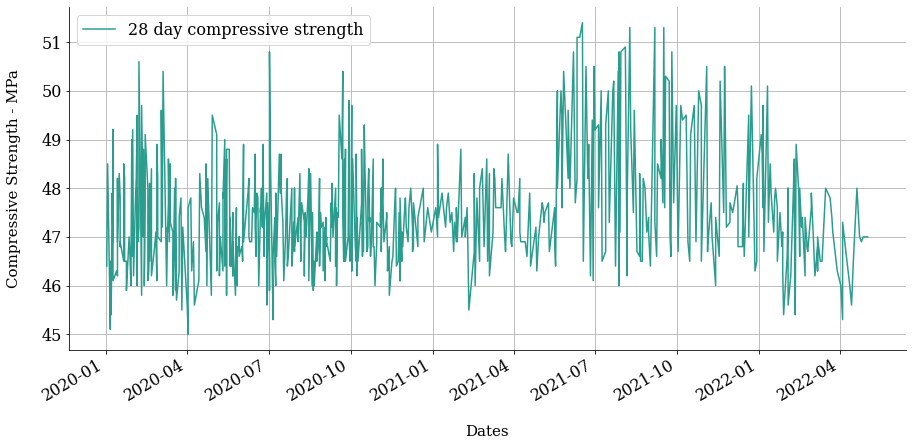

<IPython.core.display.Javascript object>

In [64]:
tmp = df[["Date", "28 day Compressive strength"]].dropna().copy()
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()